# BUILT Models

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import joblib
from data_preprocessing import *


 Prime righe del dataset VALORI:
   area_territoriale regione prov  comune_istat comune_cat sez comune_amm  \
0          NORD-EST  VENETO   VR       5023091       D6AA           L781   
1          NORD-EST  VENETO   VR       5023091       D6AA           L781   
2          NORD-EST  VENETO   VR       5023091       D6AA           L781   
3          NORD-EST  VENETO   VR       5023091       D6AA           L781   
4          NORD-EST  VENETO   VR       5023091       D6AA           L781   

  comune_descrizione fascia zona  ...               descr_tipologia    stato  \
0             VERONA      B   B2  ...             Abitazioni civili  NORMALE   
1             VERONA      B   B2  ...             Abitazioni civili   OTTIMO   
2             VERONA      B   B2  ...  Abitazioni di tipo economico  NORMALE   
3             VERONA      B   B2  ...                        Negozi  NORMALE   
4             VERONA      B   B2  ...                        Uffici  NORMALE   

  stato_prev compr_min comp

## Unificazione dati OMI per la provincia di Verona (2023-2024)


### 📌 PASSO 1: Caricare i file CSV
6 file: 3 file "valori" e 3 file "zone", uno per ciascun semestre.

✅ Obiettivo: Scrivere una funzione per caricare i file in un DataFrame, gestendo la rimozione della prima riga di intestazione

Sto organizzando i dati di Verona suddivisi per semestre (2023 e 2024). Ogni file contiene informazioni sui prezzi immobiliari e sulla suddivisione delle zone.

In [2]:
# Caricamento di tutti i file
df_valori_list = [carica_csv(files_valori[sem], sem) for sem in files_valori]
df_zone_list = [carica_csv(files_zone[sem], sem) for sem in files_zone]

# Creiamo due DataFrame unificati
df_valori = pd.concat(df_valori_list, ignore_index=True)
df_zone = pd.concat(df_zone_list, ignore_index=True)

# Verifichiamo i dati caricati
print("\n Prime righe del dataset VALORI:\n", df_valori.head())
print("\n Prime righe del dataset ZONE:\n", df_zone.head())


 Prime righe del dataset VALORI:
   area_territoriale regione prov  comune_istat comune_cat sez comune_amm  \
0          NORD-EST  VENETO   VR       5023091       D6AA           L781   
1          NORD-EST  VENETO   VR       5023091       D6AA           L781   
2          NORD-EST  VENETO   VR       5023091       D6AA           L781   
3          NORD-EST  VENETO   VR       5023091       D6AA           L781   
4          NORD-EST  VENETO   VR       5023091       D6AA           L781   

  comune_descrizione fascia zona  ...               descr_tipologia    stato  \
0             VERONA      B   B2  ...             Abitazioni civili  NORMALE   
1             VERONA      B   B2  ...             Abitazioni civili   OTTIMO   
2             VERONA      B   B2  ...  Abitazioni di tipo economico  NORMALE   
3             VERONA      B   B2  ...                        Negozi  NORMALE   
4             VERONA      B   B2  ...                        Uffici  NORMALE   

  stato_prev compr_min comp

- I dati "valori" contengono informazioni sulle quotazioni immobiliari, cioè prezzi di compravendita e locazione.
- I dati "zone" contengono informazioni geografiche sulle zone OMI e le tipologie di immobili predominanti.

### 📌 PASSO 2: Pulizia dei Dati
✅ Obiettivo: Creare una funzione per pulire i dati

In [3]:
# Pulizia del dataset VALORI
df_valori_pulito = pulisci_dati(df_valori)

# Pulizia del dataset ZONE
df_zone_pulito = pulisci_dati(df_zone)

# Controllo dei dati dopo la pulizia
print("\n Controllo valori mancanti dopo la pulizia (VALORI):\n", df_valori_pulito.isnull().sum())
print("\n Controllo valori mancanti dopo la pulizia (ZONE):\n", df_zone_pulito.isnull().sum())

# Controllo dei tipi di dati dopo la conversione
print("\n Tipi di dati dopo la conversione (VALORI):\n", df_valori_pulito.dtypes)
print("\n Tipi di dati dopo la conversione (ZONE):\n", df_zone_pulito.dtypes)


c:\Users\emmal\Desktop\STAGE\PROGETTO\MatterOfDesign\BuiltModels\data_preprocessing.py:95: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Imputazione con mediana per numeri
c:\Users\emmal\Desktop\STAGE\PROGETTO\MatterOfDesign\BuiltModels\data_preprocessing.py:95: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the i


 Controllo valori mancanti dopo la pulizia (VALORI):
 area_territoriale     0
regione               0
prov                  0
comune_istat          0
comune_cat            0
sez                   0
comune_amm            0
comune_descrizione    0
fascia                0
zona                  0
linkzona              0
cod_tip               0
descr_tipologia       0
stato                 0
stato_prev            0
compr_min             0
compr_max             0
sup_nl_compr          0
loc_min               0
loc_max               0
sup_nl_loc            0
semestre              0
dtype: int64

 Controllo valori mancanti dopo la pulizia (ZONE):
 area_territoriale     0
regione               0
prov                  0
comune_istat          0
comune_cat            0
sez                   0
comune_amm            0
comune_descrizione    0
fascia                0
zona_descr            0
zona                  0
linkzona              0
cod_tip_prev          0
descr_tip_prev        0
stato_prev     

c:\Users\emmal\Desktop\STAGE\PROGETTO\MatterOfDesign\BuiltModels\data_preprocessing.py:98: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Imputazione con il valore più frequente per testo


Sono stati ripuliti i dati correggendo i numeri e riempendo eventuali valori mancanti in modo da evitare errori nelle analisi.
I dati sono completi e corretti per poter proseguire nell'analisi.

### 📌 PASSO 3: Analisi delle Colonne
✅ Obiettivi:
1. Stampare l’elenco delle colonne disponibili nei due dataset.
2. Capire il significato di ciascuna colonna e la sua utilità.
3. Decidere quali colonne eliminare.

In [4]:
# Stampa i nomi delle colonne disponibili nei dataset
print("\n Colonne presenti nel dataset VALORI:\n", df_valori_pulito.columns.tolist())
print("\n Colonne presenti nel dataset ZONE:\n", df_zone_pulito.columns.tolist())

# Conta quante colonne ha ogni dataset
print("\n Numero di colonne nel dataset VALORI:", len(df_valori_pulito.columns))
print(" Numero di colonne nel dataset ZONE:", len(df_zone_pulito.columns))

# Analisi della presenza di valori unici per colonna (per identificare colonne ridondanti)
print("\n Numero di valori unici per colonna nel dataset VALORI:\n", df_valori_pulito.nunique())
print("\n Numero di valori unici per colonna nel dataset ZONE:\n", df_zone_pulito.nunique())

# Visualizza statistiche descrittive per tutte le colonne numeriche
print("\n Statistiche descrittive per il dataset VALORI:\n", df_valori_pulito.describe())
print("\n Statistiche descrittive per il dataset ZONE:\n", df_zone_pulito.describe())


 Colonne presenti nel dataset VALORI:
 ['area_territoriale', 'regione', 'prov', 'comune_istat', 'comune_cat', 'sez', 'comune_amm', 'comune_descrizione', 'fascia', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev', 'compr_min', 'compr_max', 'sup_nl_compr', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre']

 Colonne presenti nel dataset ZONE:
 ['area_territoriale', 'regione', 'prov', 'comune_istat', 'comune_cat', 'sez', 'comune_amm', 'comune_descrizione', 'fascia', 'zona_descr', 'zona', 'linkzona', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev', 'microzona', 'semestre']

 Numero di colonne nel dataset VALORI: 22
 Numero di colonne nel dataset ZONE: 17

 Numero di valori unici per colonna nel dataset VALORI:
 area_territoriale       1
regione                 1
prov                    1
comune_istat           98
comune_cat             98
sez                     1
comune_amm             98
comune_descrizione     98
fascia                  5
zona                   26
lin

Ho verificato quali dati sono disponibili e analizzato le informazioni chiave (media, deviazione standard, percentili, valore minimo e massimo). Viene valutato se ci sono eventuali anomalie nel dataset, che non sono presenti.

### 📌 PASSO 4: Eliminazione delle Colonne con un Solo Valore Unico
✅ Obiettivi:

1. Identificare automaticamente le colonne con un solo valore unico.
2. Scrivere una funzione per eliminare queste colonne in qualsiasi dataset.
3. Applicare la funzione ai dataset df_valori_pulito e df_zone_pulito.


In [5]:
# Eliminazione colonne con un solo valore unico
df_valori_pulito = rimuovi_colonne_uniche(df_valori_pulito)
df_zone_pulito = rimuovi_colonne_uniche(df_zone_pulito)

# Controllo delle colonne rimanenti
print("\n Colonne rimanenti nel dataset VALORI:\n", df_valori_pulito.columns.tolist())
print("\n Colonne rimanenti nel dataset ZONE:\n", df_zone_pulito.columns.tolist())


 Colonne rimosse: ['area_territoriale', 'regione', 'prov', 'sez', 'sup_nl_compr']

 Colonne rimosse: ['area_territoriale', 'regione', 'prov', 'sez']

 Colonne rimanenti nel dataset VALORI:
 ['comune_istat', 'comune_cat', 'comune_amm', 'comune_descrizione', 'fascia', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev', 'compr_min', 'compr_max', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre']

 Colonne rimanenti nel dataset ZONE:
 ['comune_istat', 'comune_cat', 'comune_amm', 'comune_descrizione', 'fascia', 'zona_descr', 'zona', 'linkzona', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev', 'microzona', 'semestre']


Vengono eliminate le colonne contenenti solo valori unici (un valore fisso per ogni riga) perchè non aggiungono informazioni rilevanti all'analisi.
Vengono mantenute quindi solamente le informazioni essenziali, eliminando dati rindondati o inutili.

### 📌 PASSO 5: Preparare l'unione tra i dataset

In [6]:
# Controlla le colonne disponibili in entrambi i dataset
print("\n Colonne nel dataset VALORI:\n", df_valori_pulito.columns.tolist())
print("\n Colonne nel dataset ZONE:\n", df_zone_pulito.columns.tolist())

# Trova le colonne in comune (potenziali chiavi di unione)
colonne_comuni = list(set(df_valori_pulito.columns) & set(df_zone_pulito.columns))
print("\n Colonne in comune tra i due dataset (possibili chiavi di join):\n", colonne_comuni)


 Colonne nel dataset VALORI:
 ['comune_istat', 'comune_cat', 'comune_amm', 'comune_descrizione', 'fascia', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev', 'compr_min', 'compr_max', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre']

 Colonne nel dataset ZONE:
 ['comune_istat', 'comune_cat', 'comune_amm', 'comune_descrizione', 'fascia', 'zona_descr', 'zona', 'linkzona', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev', 'microzona', 'semestre']

 Colonne in comune tra i due dataset (possibili chiavi di join):
 ['comune_descrizione', 'linkzona', 'stato_prev', 'zona', 'comune_cat', 'semestre', 'fascia', 'comune_istat', 'comune_amm']


### 📌 PASSO 6: Unire i dataset

In [7]:
# Unione dei dataset basata sulle colonne comuni
df_unificato = pd.merge(df_valori_pulito, df_zone_pulito, on=["zona", "linkzona", "semestre"], how="left")

# Controllo del dataset unificato
print("\n Dataset unificato, prime righe:\n", df_unificato.head())

# Controllo di eventuali valori NaN dopo l'unione
print("\n Valori mancanti nel dataset unificato:\n", df_unificato.isnull().sum())



 Dataset unificato, prime righe:
    comune_istat_x comune_cat_x comune_amm_x comune_descrizione_x fascia_x  \
0       5023091.0         D6AA         L781               VERONA        B   
1       5023091.0         D6AA         L781               VERONA        B   
2       5023091.0         D6AA         L781               VERONA        B   
3       5023091.0         D6AA         L781               VERONA        B   
4       5023091.0         D6AA         L781               VERONA        B   

  zona    linkzona  cod_tip               descr_tipologia    stato  ...  \
0   B2  VR00000844     20.0             Abitazioni civili  NORMALE  ...   
1   B2  VR00000844     20.0             Abitazioni civili   OTTIMO  ...   
2   B2  VR00000844     21.0  Abitazioni di tipo economico  NORMALE  ...   
3   B2  VR00000844      5.0                        Negozi  NORMALE  ...   
4   B2  VR00000844      6.0                        Uffici  NORMALE  ...   

  comune_istat_y  comune_cat_y  comune_amm_y  comun

In [8]:
# Salvataggio del dataset pulito
df_unificato.to_csv(os.path.join(cartella_dati, "DatiOMI_Unificato.csv"), index=False, sep=";")
print("\n✅ Dataset unificato salvato con successo!")


✅ Dataset unificato salvato con successo!


Ho creato un unico dataset (unendo i dati su zone e valori) che collega i prezzi degli immobili alle zone di Verona, permettendo di analizzare al meglio il mercato immobiliare.

## Analisi esplorativa del dataset

### 📌 PASSO 1: Analisi Strutturale del Dataset
✅ Obiettivo: Capire la struttura e le caratteristiche generali del dataset.

In [9]:
# Dimensione del dataset
print("\n Il dataset contiene:", df_unificato.shape[0], "righe e", df_unificato.shape[1], "colonne.")

# Visualizzare le prime righe per un'anteprima
print("\n Prime righe del dataset:")
print(df_unificato.head())

# Tipi di dati
print("\n Tipi di dati per ogni colonna:")
print(df_unificato.dtypes)

# Statistiche descrittive per colonne numeriche
print("\n Statistiche descrittive per le colonne numeriche:")
print(df_unificato.describe())

# Statistiche per le colonne categoriche
print("\n Distribuzione delle variabili categoriche:")
for col in df_unificato.select_dtypes(exclude=["number"]).columns:
    print(f"\n {col}:")
    print(df_unificato[col].value_counts())

# Nuova analisi: Distribuzione del numero di osservazioni per comune
print("\n Numero di osservazioni per comune:")
print(df_unificato["comune_descrizione_x"].value_counts())



 Il dataset contiene: 3575 righe e 27 colonne.

 Prime righe del dataset:
   comune_istat_x comune_cat_x comune_amm_x comune_descrizione_x fascia_x  \
0       5023091.0         D6AA         L781               VERONA        B   
1       5023091.0         D6AA         L781               VERONA        B   
2       5023091.0         D6AA         L781               VERONA        B   
3       5023091.0         D6AA         L781               VERONA        B   
4       5023091.0         D6AA         L781               VERONA        B   

  zona    linkzona  cod_tip               descr_tipologia    stato  ...  \
0   B2  VR00000844     20.0             Abitazioni civili  NORMALE  ...   
1   B2  VR00000844     20.0             Abitazioni civili   OTTIMO  ...   
2   B2  VR00000844     21.0  Abitazioni di tipo economico  NORMALE  ...   
3   B2  VR00000844      5.0                        Negozi  NORMALE  ...   
4   B2  VR00000844      6.0                        Uffici  NORMALE  ...   

  comune_is

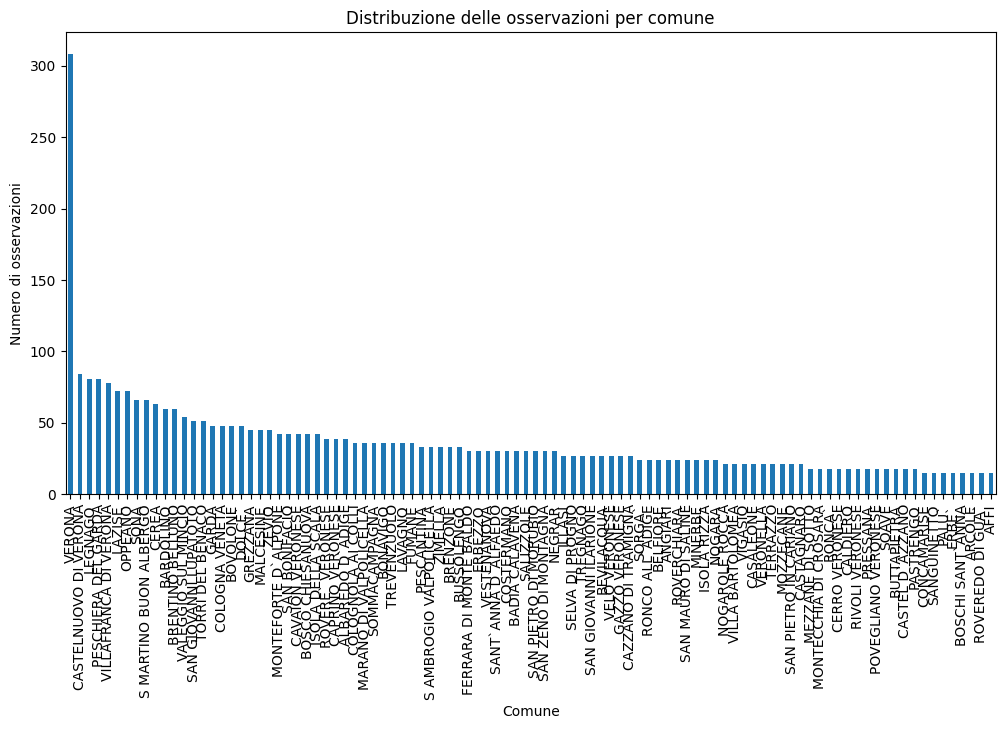

In [10]:
# Visualizzazione grafica della distribuzione dei dati nei comuni
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_unificato["comune_descrizione_x"].value_counts().plot(kind="bar")
plt.title("Distribuzione delle osservazioni per comune")
plt.xlabel("Comune")
plt.ylabel("Numero di osservazioni")
plt.xticks(rotation=90)
plt.show()

Viene verificato che il dataset contenga tutte le informazioni necessarie. In particolare:

Il numero di record (immobili analizzati).
Le statistiche sui prezzi medi, massimi e minimi per compravendita e locazione.
La distribuzione delle zone e delle altre variabili testuali.

Grafico a barre della distribuzione delle osservazioni per comune, utile per visualizzare rapidamente la presenza dei dati nei diversi comuni della provincia.

### 📌 PASSO 2: Analisi delle distribuzioni
✅ Obiettivo: Capire la distribuzioni delle colonne

C:\Users\emmal\AppData\Local\Temp\ipykernel_8732\1471194526.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="comune_descrizione_x", y="compr_max", data=df_top, palette="coolwarm")


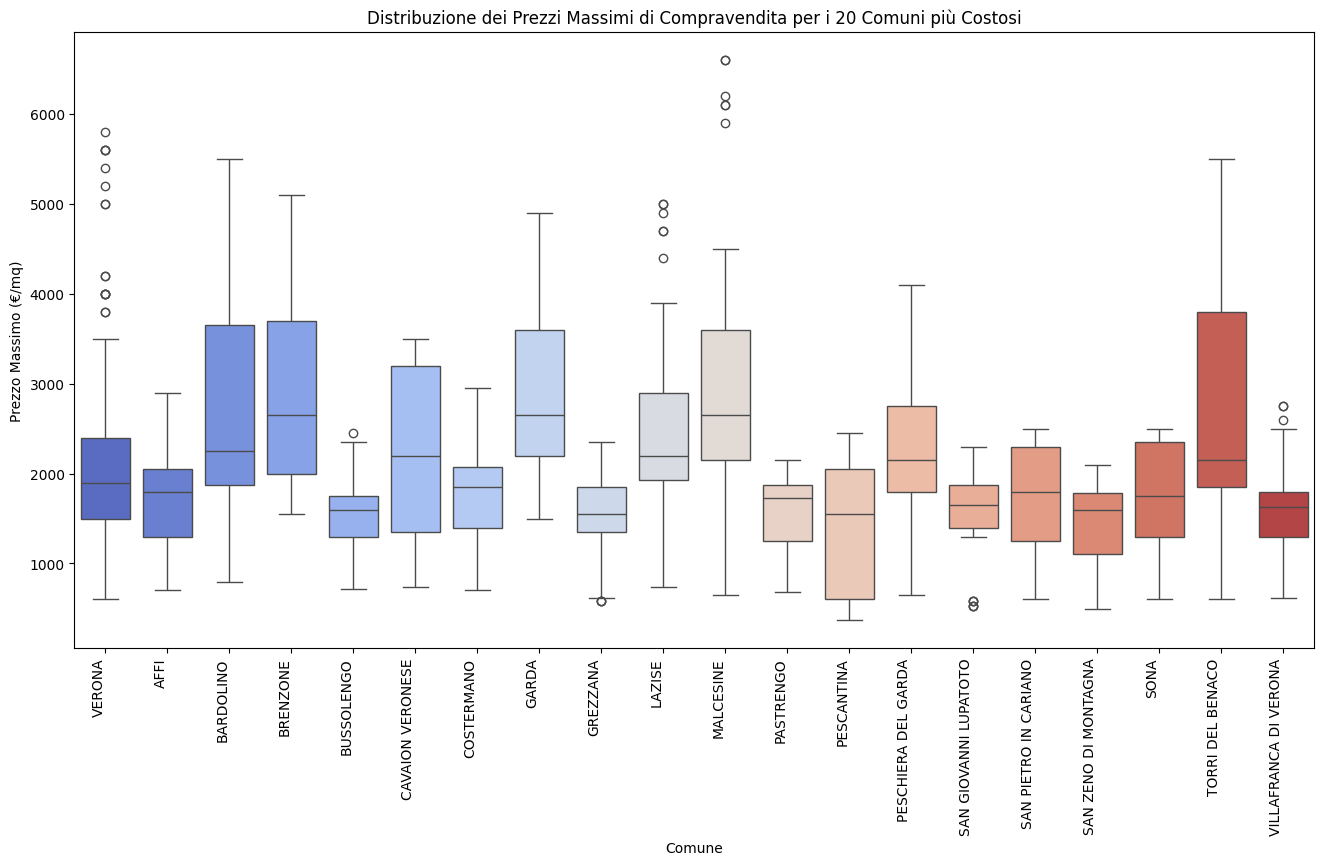

C:\Users\emmal\AppData\Local\Temp\ipykernel_8732\1471194526.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prezzi_comuni.index[:20], y=prezzi_comuni.values[:20], palette="coolwarm")


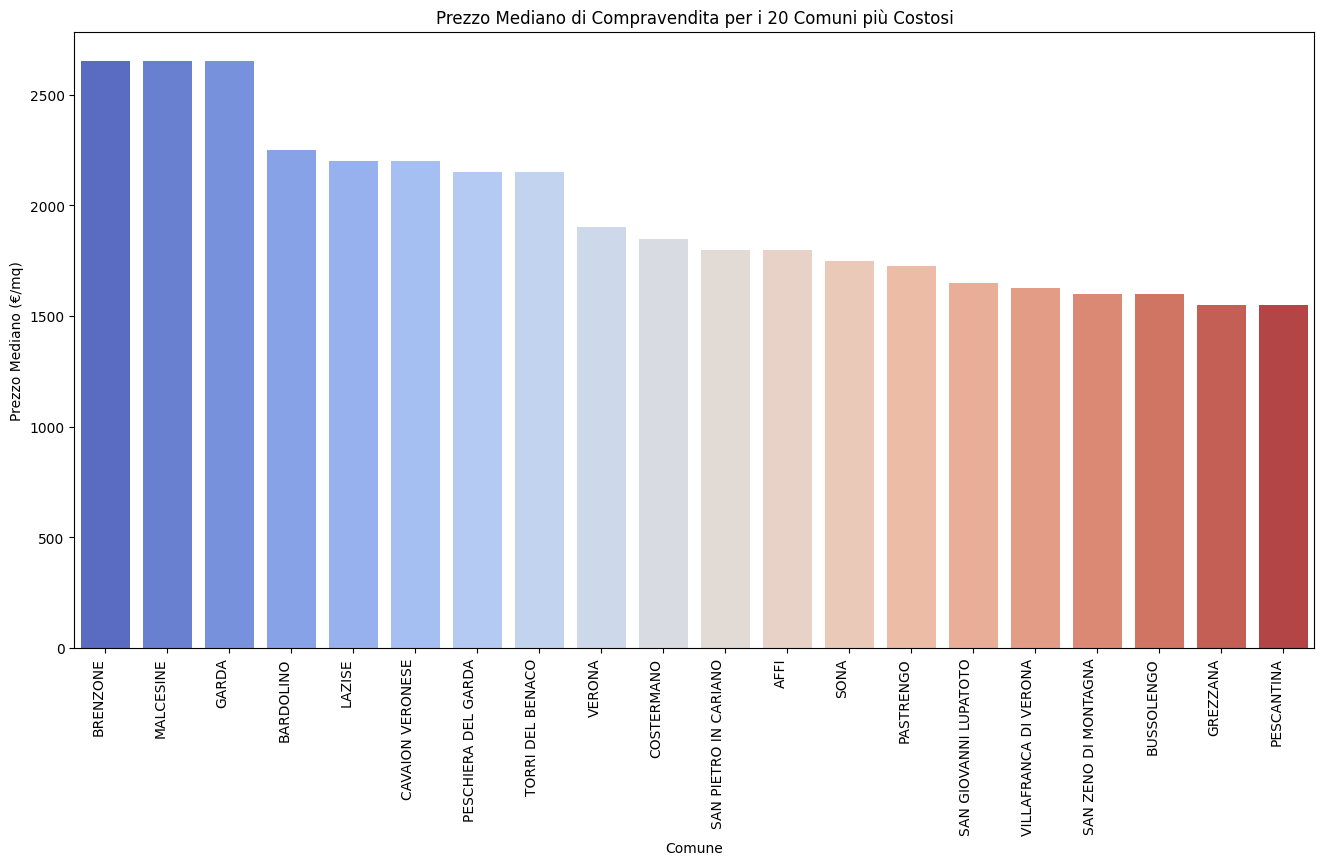

C:\Users\emmal\AppData\Local\Temp\ipykernel_8732\1471194526.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="comune_descrizione_x", y="compr_max", data=df_bottom, palette="coolwarm")


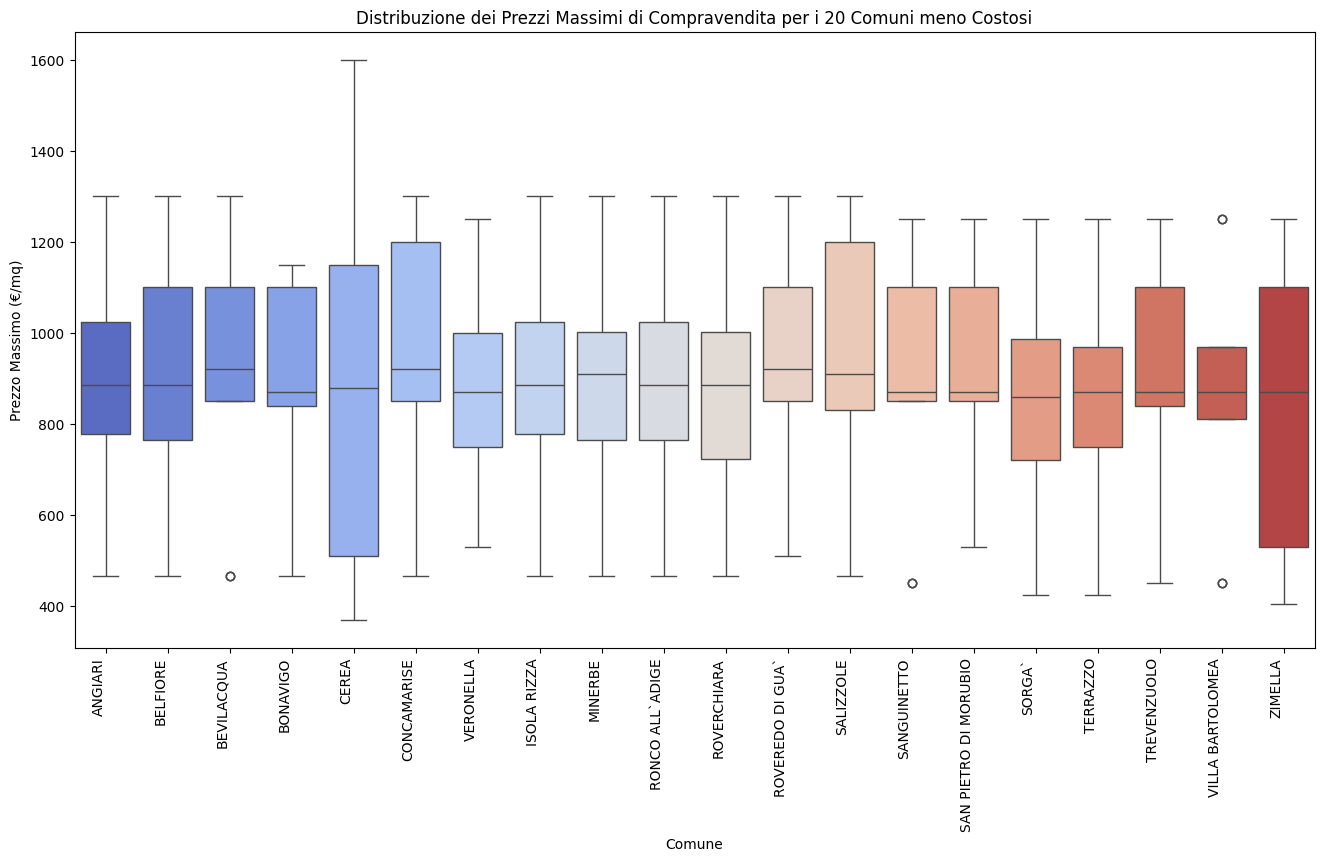

C:\Users\emmal\AppData\Local\Temp\ipykernel_8732\1471194526.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prezzi_comuni.index[-20:], y=prezzi_comuni.values[-20:], palette="coolwarm")


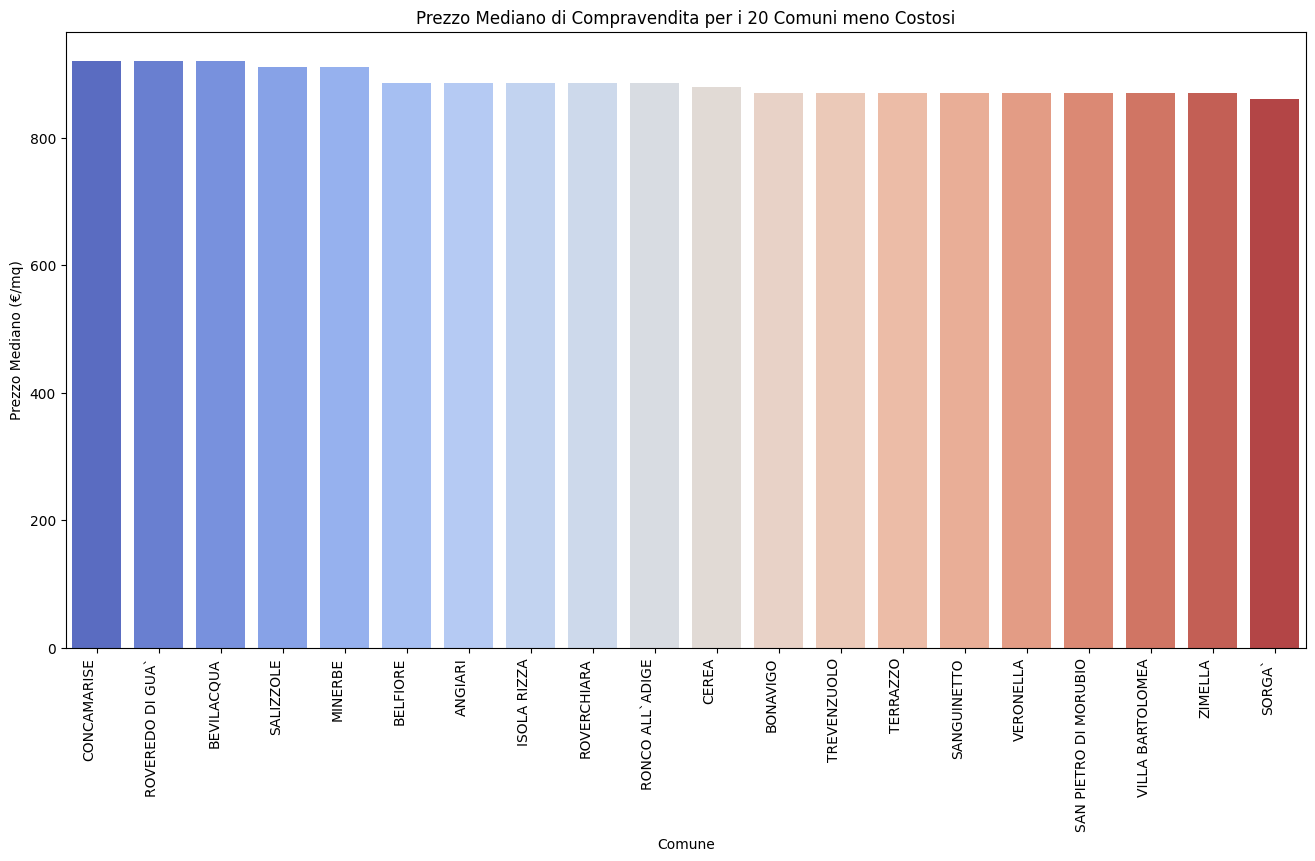

In [11]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "comune_descrizione_x"])

# Calcoliamo la mediana dei prezzi per comune
prezzi_comuni = df_filtrato.groupby("comune_descrizione_x")["compr_max"].median().sort_values(ascending=False)

# Selezioniamo solo i 20 comuni con il prezzo mediano più alto
top_comuni = prezzi_comuni.head(20).index
df_top = df_filtrato[df_filtrato["comune_descrizione_x"].isin(top_comuni)]

# Selezioniamo solo i 20 comuni con il prezzo mediano più basso
bottom_comuni = prezzi_comuni.tail(20).index
df_bottom = df_filtrato[df_filtrato["comune_descrizione_x"].isin(bottom_comuni)]

# 1. Distribuzione dei Prezzi Massimi di Compravendita per i 20 Comuni più Costosi
plt.figure(figsize=(16, 8))
sns.boxplot(x="comune_descrizione_x", y="compr_max", data=df_top, palette="coolwarm")
plt.xticks(rotation=90, ha='right')
plt.title("Distribuzione dei Prezzi Massimi di Compravendita per i 20 Comuni più Costosi")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo (€/mq)")
plt.show()

# 2. Prezzo Mediano di Compravendita per i 20 Comuni più Costosi
plt.figure(figsize=(16, 8))
sns.barplot(x=prezzi_comuni.index[:20], y=prezzi_comuni.values[:20], palette="coolwarm")
plt.xticks(rotation=90, ha='right')
plt.title("Prezzo Mediano di Compravendita per i 20 Comuni più Costosi")
plt.xlabel("Comune")
plt.ylabel("Prezzo Mediano (€/mq)")
plt.show()

# 3. Distribuzione dei Prezzi Massimi di Compravendita per i 20 Comuni meno Costosi
plt.figure(figsize=(16, 8))
sns.boxplot(x="comune_descrizione_x", y="compr_max", data=df_bottom, palette="coolwarm")
plt.xticks(rotation=90, ha='right')
plt.title("Distribuzione dei Prezzi Massimi di Compravendita per i 20 Comuni meno Costosi")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo (€/mq)")
plt.show()

# 4. Prezzo Mediano di Compravendita per i 20 Comuni meno Costosi
plt.figure(figsize=(16, 8))
sns.barplot(x=prezzi_comuni.index[-20:], y=prezzi_comuni.values[-20:], palette="coolwarm")
plt.xticks(rotation=90, ha='right')
plt.title("Prezzo Mediano di Compravendita per i 20 Comuni meno Costosi")
plt.xlabel("Comune")
plt.ylabel("Prezzo Mediano (€/mq)")
plt.show()

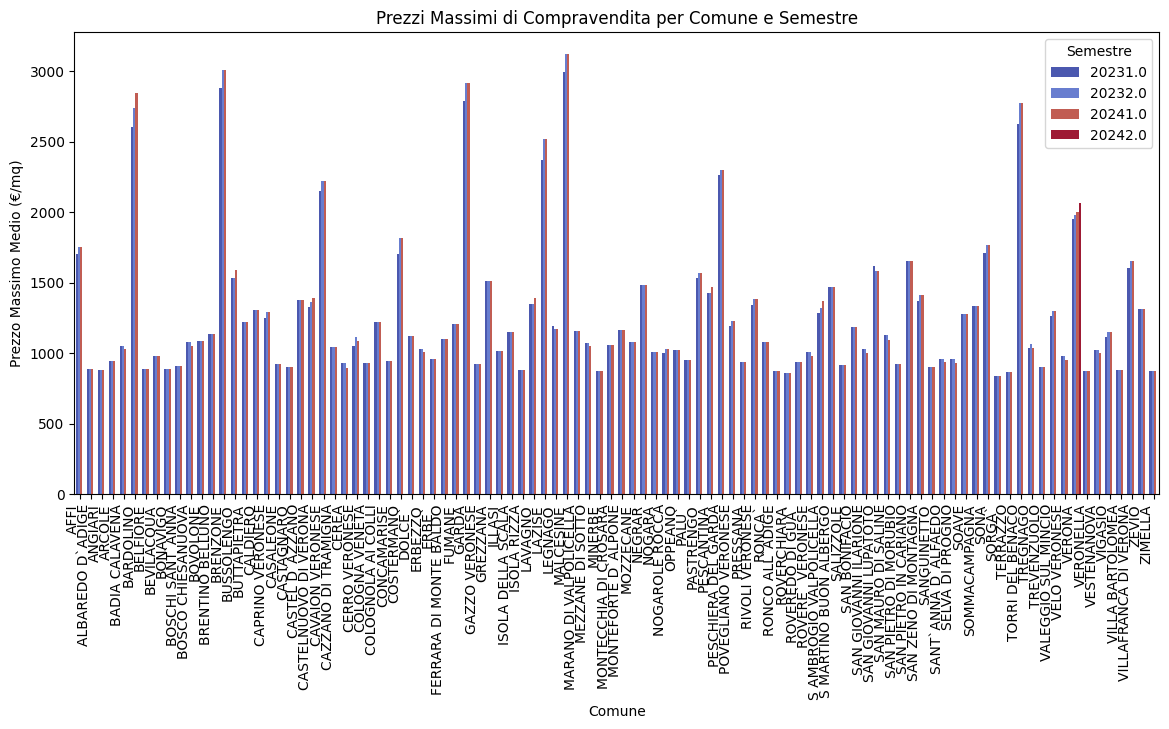

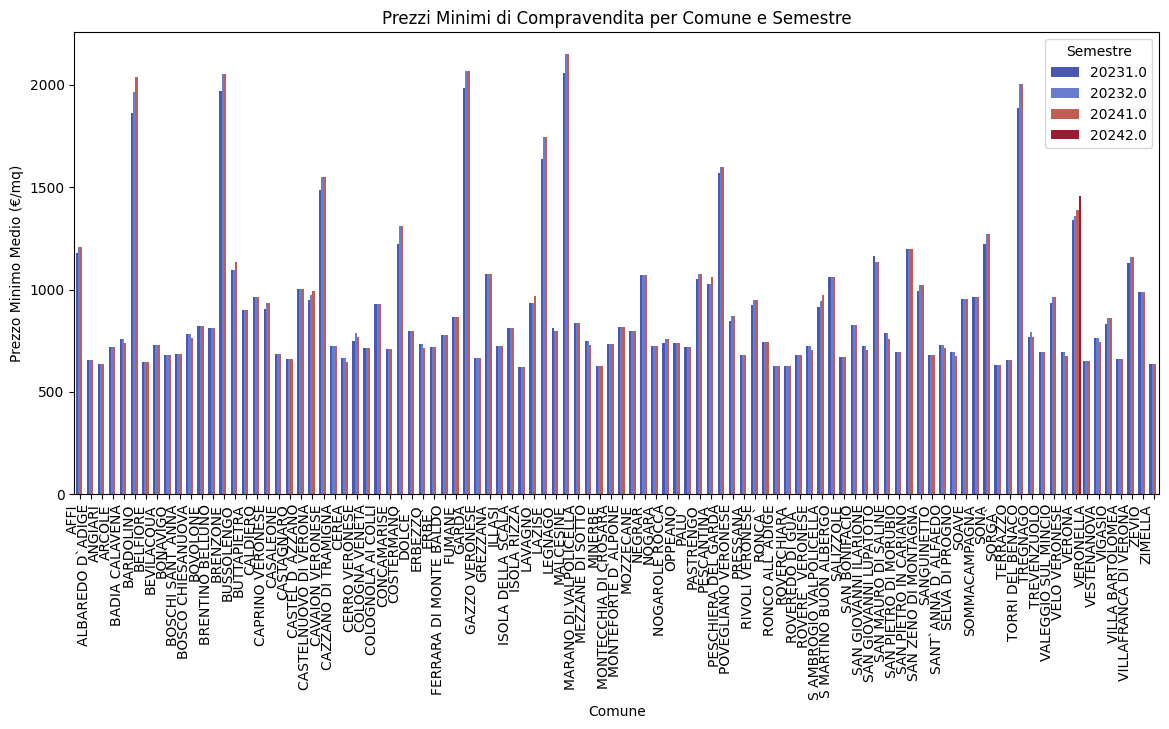

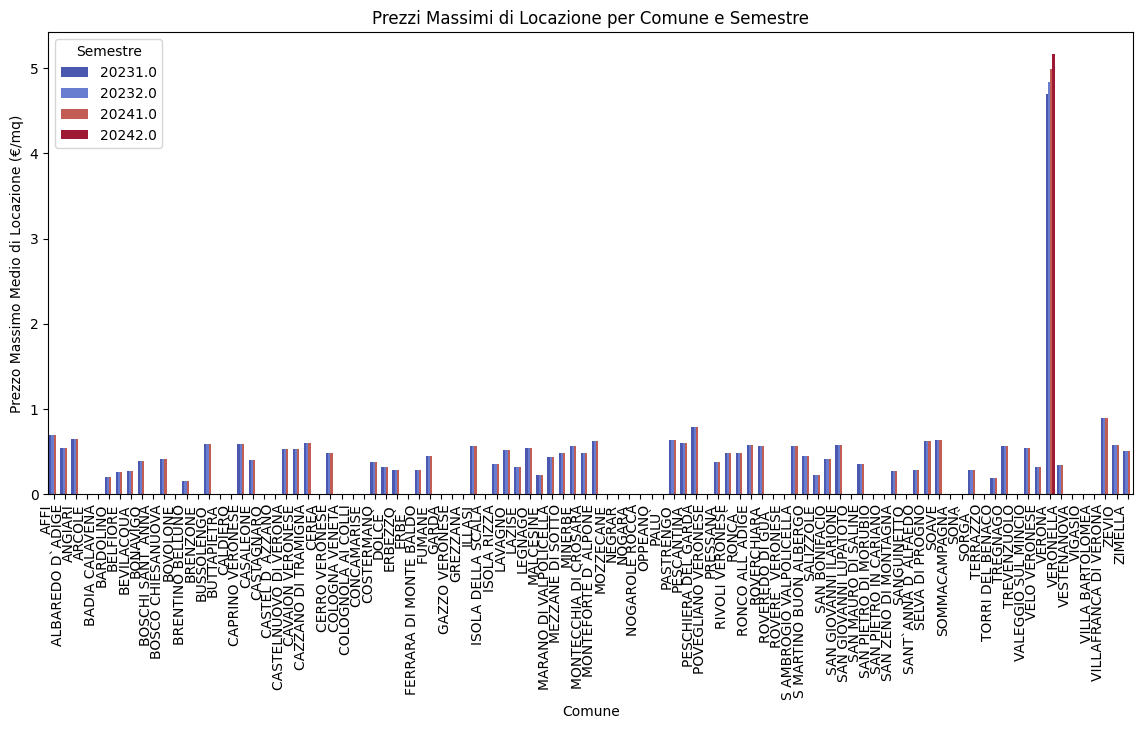

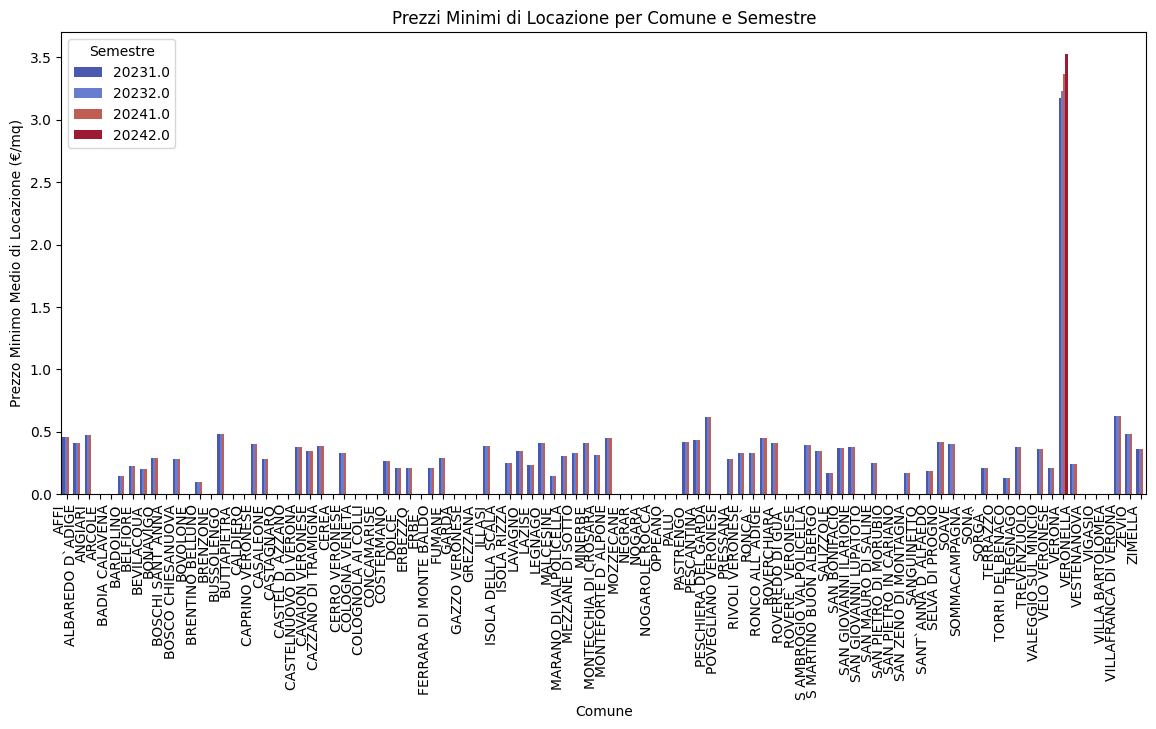

In [12]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "compr_min", "loc_max", "loc_min", "semestre", "comune_descrizione_x"])

# 3. EVOLUZIONE TEMPORALE DEI PREZZI DI COMPRAVENDITA PER COMUNE
df_aggregato = df_filtrato.groupby(["comune_descrizione_x", "semestre"]).agg({
    "compr_max": "mean",
    "compr_min": "mean",
    "loc_max": "mean",
    "loc_min": "mean"
}).reset_index()

# Creazione del grafico a barre per i prezzi massimi di compravendita
plt.figure(figsize=(14, 6))
sns.barplot(data=df_aggregato, x="comune_descrizione_x", y="compr_max", hue="semestre", palette="coolwarm")
plt.title("Prezzi Massimi di Compravendita per Comune e Semestre")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo Medio (€/mq)")
plt.legend(title="Semestre")
plt.xticks(rotation=90, ha='right')
plt.show()

# Creazione del grafico a barre per i prezzi minimi di compravendita
plt.figure(figsize=(14, 6))
sns.barplot(data=df_aggregato, x="comune_descrizione_x", y="compr_min", hue="semestre", palette="coolwarm")
plt.title("Prezzi Minimi di Compravendita per Comune e Semestre")
plt.xlabel("Comune")
plt.ylabel("Prezzo Minimo Medio (€/mq)")
plt.legend(title="Semestre")
plt.xticks(rotation=90, ha='right')
plt.show()

# Creazione del grafico a barre per i prezzi massimi di locazione
plt.figure(figsize=(14, 6))
sns.barplot(data=df_aggregato, x="comune_descrizione_x", y="loc_max", hue="semestre", palette="coolwarm")
plt.title("Prezzi Massimi di Locazione per Comune e Semestre")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo Medio di Locazione (€/mq)")
plt.legend(title="Semestre")
plt.xticks(rotation=90, ha='right')
plt.show()

# Creazione del grafico a barre per i prezzi minimi di locazione
plt.figure(figsize=(14, 6))
sns.barplot(data=df_aggregato, x="comune_descrizione_x", y="loc_min", hue="semestre", palette="coolwarm")
plt.title("Prezzi Minimi di Locazione per Comune e Semestre")
plt.xlabel("Comune")
plt.ylabel("Prezzo Minimo Medio di Locazione (€/mq)")
plt.legend(title="Semestre")
plt.xticks(rotation=90, ha='right')
plt.show()


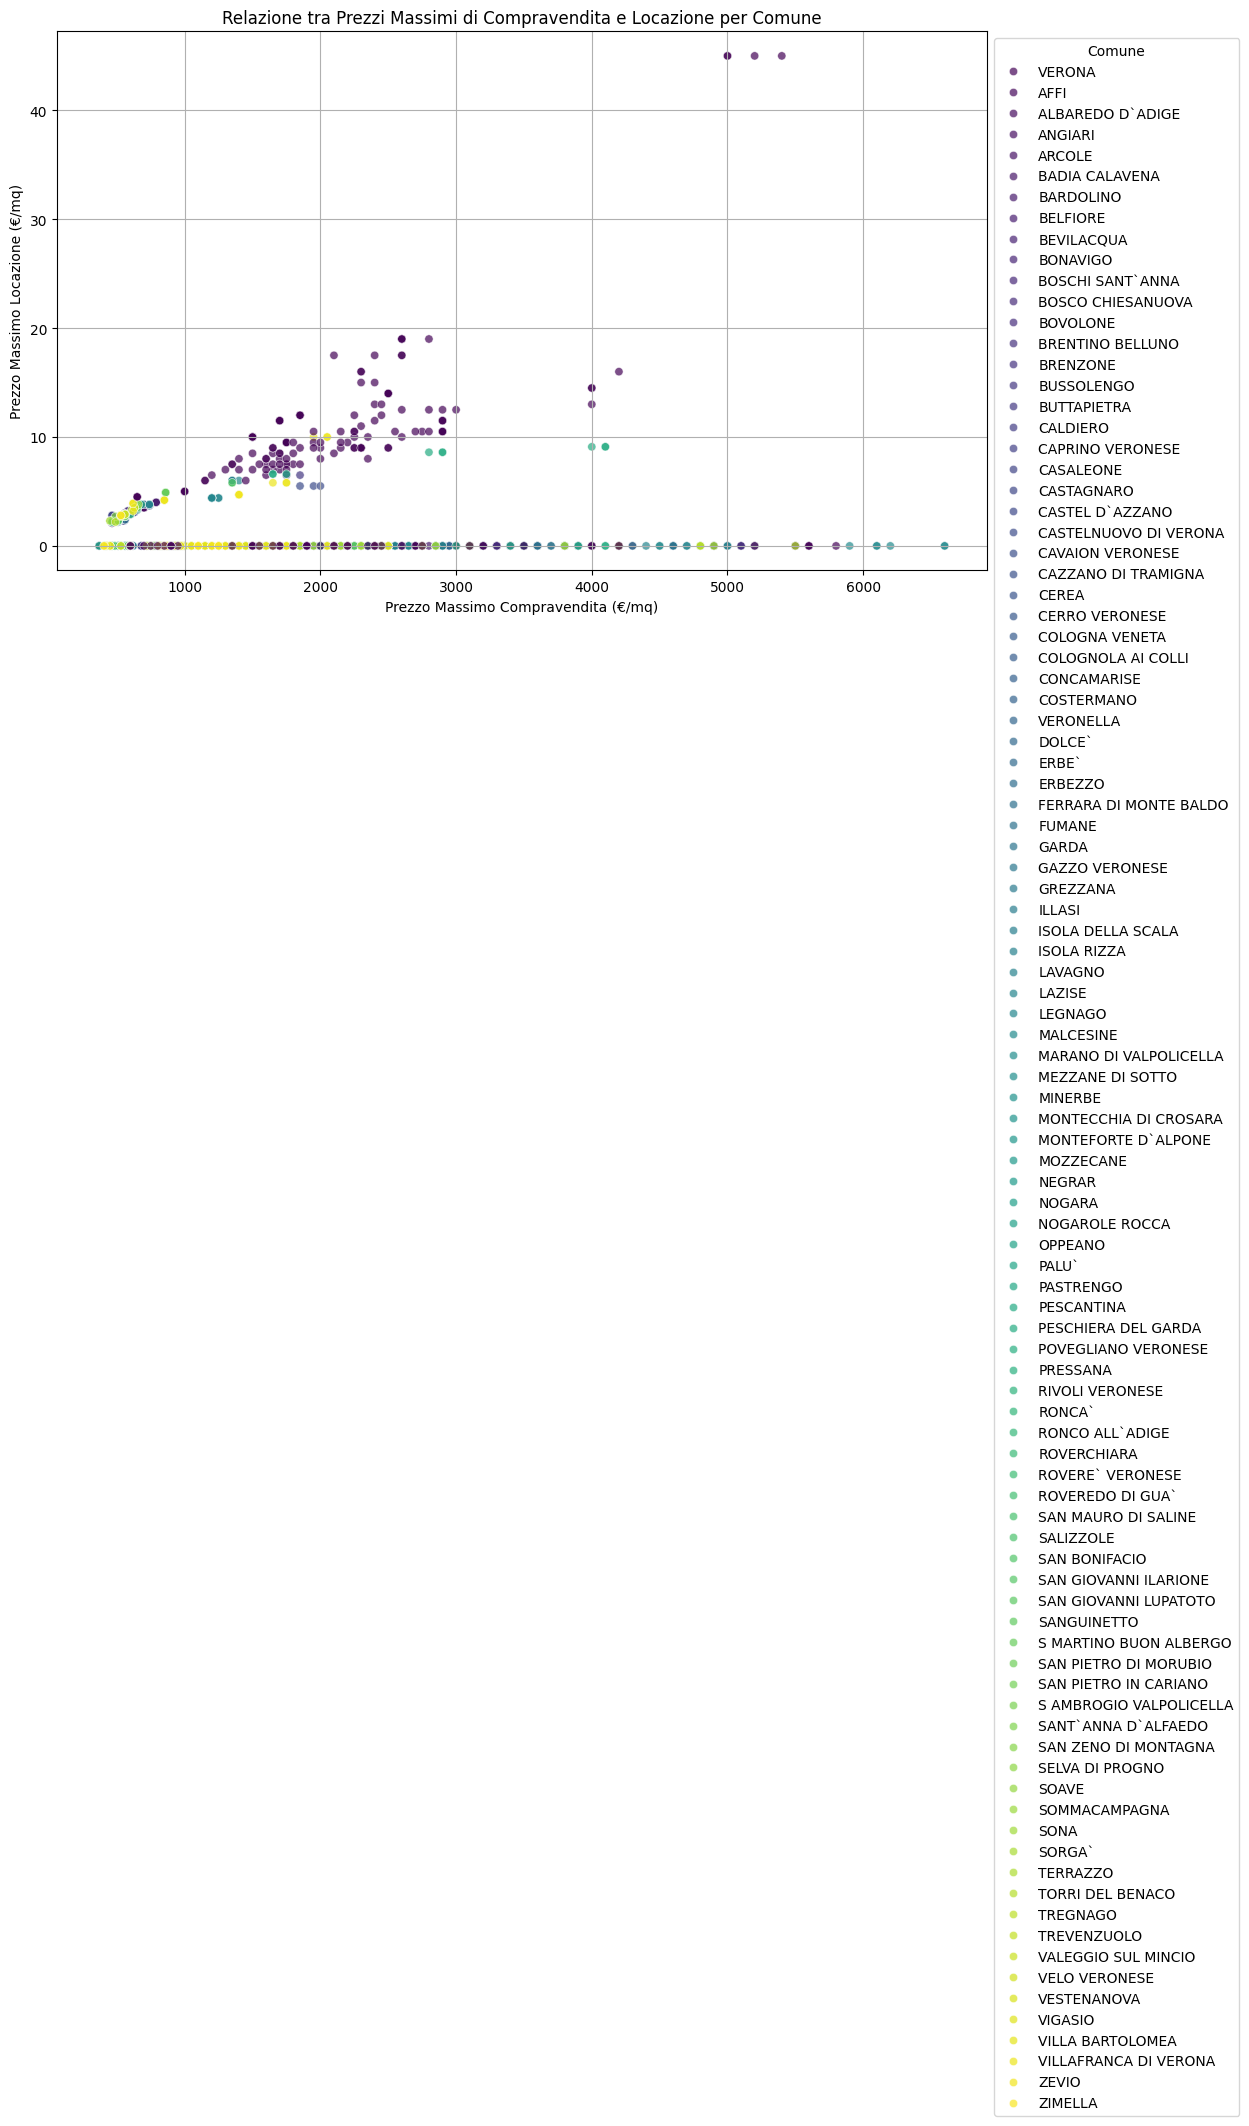

In [13]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "loc_max", "comune_descrizione_x"])

# 4. RELAZIONE TRA PREZZI DI COMPRAVENDITA E LOCAZIONE PER COMUNE
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_filtrato, x="compr_max", y="loc_max", hue="comune_descrizione_x", alpha=0.7, palette="viridis")
plt.title("Relazione tra Prezzi Massimi di Compravendita e Locazione per Comune")
plt.xlabel("Prezzo Massimo Compravendita (€/mq)")
plt.ylabel("Prezzo Massimo Locazione (€/mq)")
plt.legend(title="Comune", bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True)
plt.show()


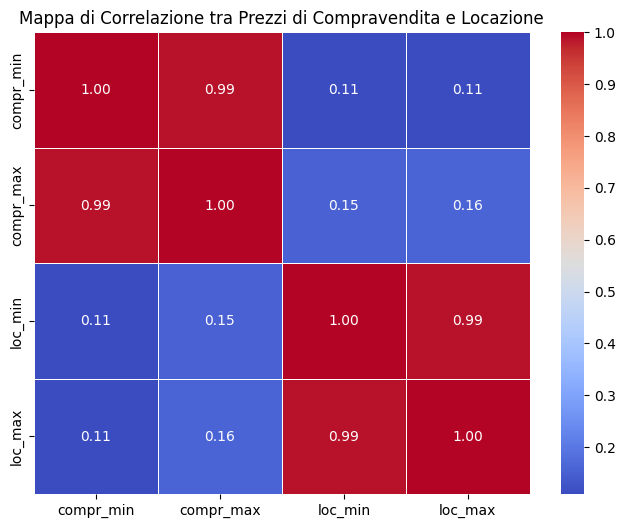

In [14]:
# Filtriamo solo le colonne di interesse e rimuoviamo eventuali NaN
df_corr = df_unificato[["compr_min", "compr_max", "loc_min", "loc_max"]].dropna()

# 5. HEATMAP DI CORRELAZIONE TRA PREZZI
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Mappa di Correlazione tra Prezzi di Compravendita e Locazione")
plt.show()


C:\Users\emmal\AppData\Local\Temp\ipykernel_8732\2238008684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="descr_tipologia", y="compr_max", data=df_filtrato, palette="magma")


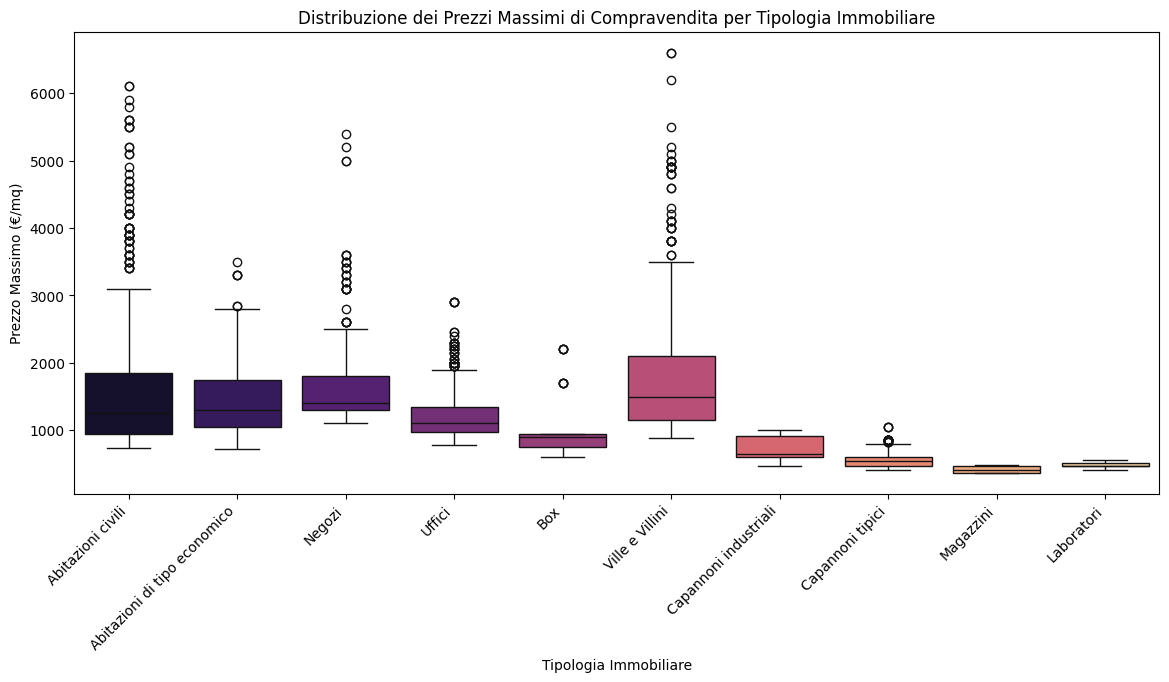

In [15]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "descr_tipologia", "comune_descrizione_x"])

# 6. DISTRIBUZIONE PREZZI PER TIPOLOGIA IMMOBILIARE (TUTTA LA PROVINCIA)
plt.figure(figsize=(14, 6))
sns.boxplot(x="descr_tipologia", y="compr_max", data=df_filtrato, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title("Distribuzione dei Prezzi Massimi di Compravendita per Tipologia Immobiliare")
plt.xlabel("Tipologia Immobiliare")
plt.ylabel("Prezzo Massimo (€/mq)")
plt.show()


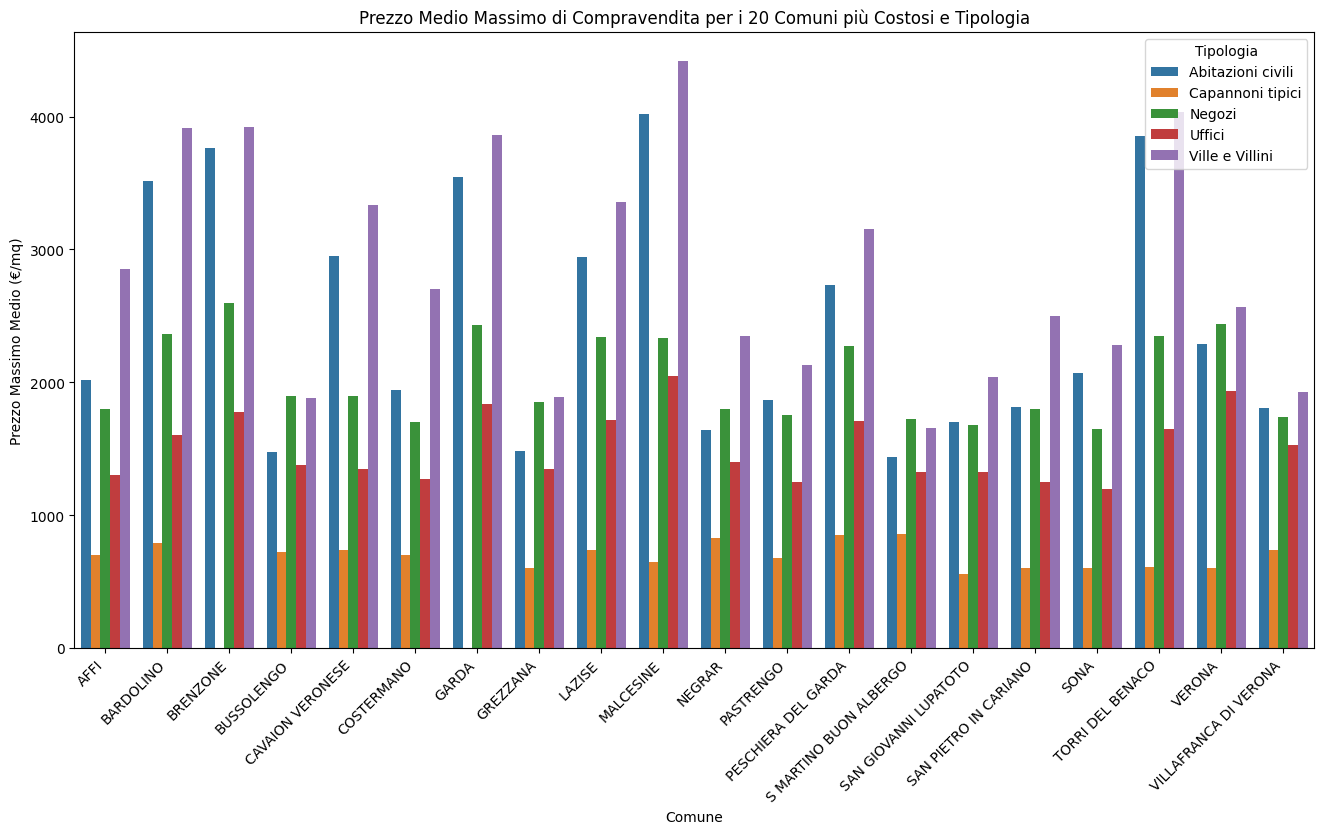

In [16]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "comune_descrizione_x", "descr_tipologia"])

# Calcolo dei prezzi medi per comune e tipologia
df_prezzi_tipologia = df_filtrato.groupby(["comune_descrizione_x", "descr_tipologia"]).agg({
    "compr_max": "mean"
}).reset_index()

# Selezioniamo solo i 20 comuni con il prezzo medio più alto
top_comuni = df_prezzi_tipologia.groupby("comune_descrizione_x")["compr_max"].mean().nlargest(20).index
df_top = df_prezzi_tipologia[df_prezzi_tipologia["comune_descrizione_x"].isin(top_comuni)]

# Selezioniamo solo le 5 tipologie più comuni
top_tipologie = df_top["descr_tipologia"].value_counts().nlargest(5).index
df_top = df_top[df_top["descr_tipologia"].isin(top_tipologie)]

# Grafico migliorato con solo i primi 20 comuni e le 5 tipologie più frequenti
plt.figure(figsize=(16, 8))
sns.barplot(data=df_top, x="comune_descrizione_x", y="compr_max", hue="descr_tipologia", palette="tab10")
plt.title("Prezzo Medio Massimo di Compravendita per i 20 Comuni più Costosi e Tipologia")
plt.xlabel("Comune")
plt.ylabel("Prezzo Massimo Medio (€/mq)")
plt.legend(title="Tipologia")
plt.xticks(rotation=45, ha='right')
plt.show()



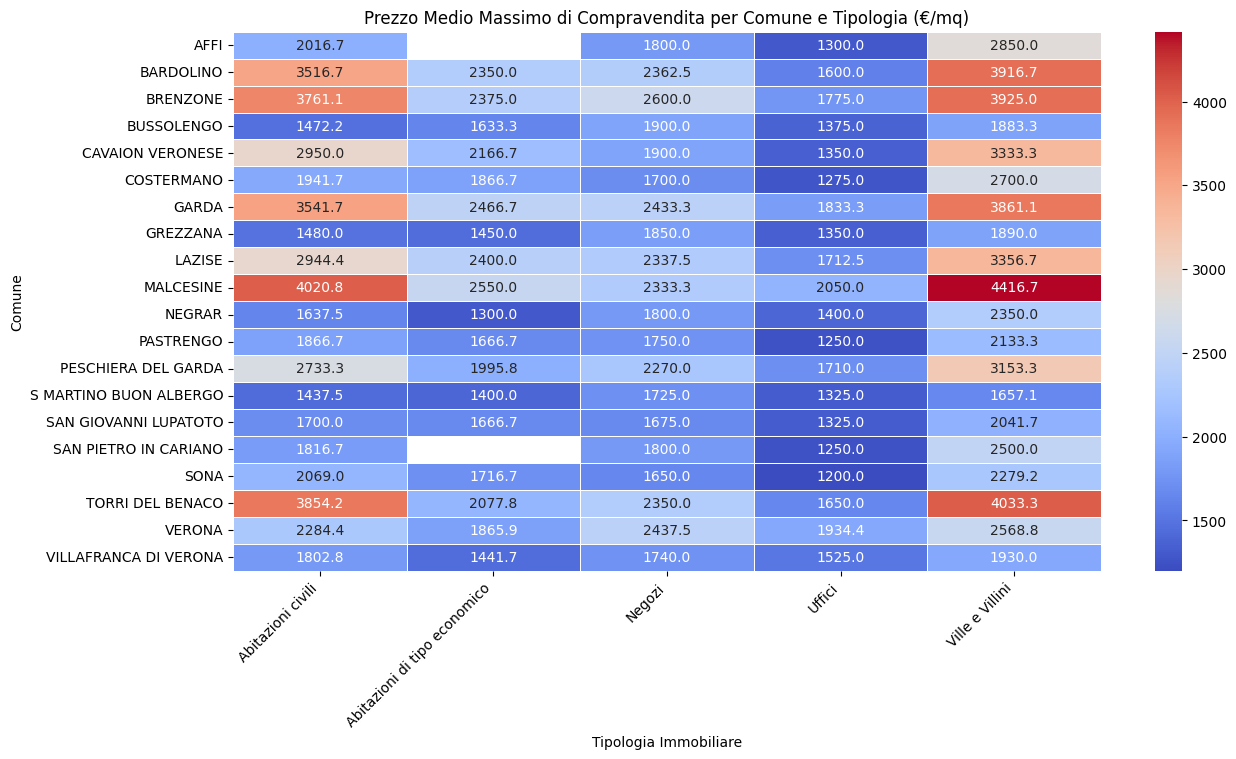

In [17]:
# Filtriamo solo i dati validi
df_filtrato = df_unificato.dropna(subset=["compr_max", "comune_descrizione_x", "descr_tipologia"])

# Selezioniamo solo i 20 comuni con i prezzi medi più alti
top_comuni = df_filtrato.groupby("comune_descrizione_x")["compr_max"].mean().nlargest(20).index
df_top = df_filtrato[df_filtrato["comune_descrizione_x"].isin(top_comuni)]

# Selezioniamo solo le 5 tipologie più comuni
top_tipologie = df_top["descr_tipologia"].value_counts().nlargest(5).index
df_top = df_top[df_top["descr_tipologia"].isin(top_tipologie)]

# Creazione di una tabella pivot per la heatmap
pivot_heatmap = df_top.pivot_table(
    index="comune_descrizione_x", 
    columns="descr_tipologia", 
    values="compr_max", 
    aggfunc="mean"
)

# Grafico Heatmap migliorato
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_heatmap, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Prezzo Medio Massimo di Compravendita per Comune e Tipologia (€/mq)")
plt.xlabel("Tipologia Immobiliare")
plt.ylabel("Comune")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()



## Feature Engineering
Calcolo le feature relative ai prezzi medi, ai range e al rapporto locazione/vendita

In [18]:
# Feature relative ai prezzi di compravendita
df_unificato['prezzo_medio_mq_vendita'] = \
(df_unificato['compr_min'] + df_unificato['compr_max']) / 2
df_unificato['range_prezzo_mq_vendita'] = \
df_unificato['compr_max'] - df_unificato['compr_min']
print("Create feature: 'prezzo_medio_mq_vendita', 'range_prezzo_mq_vendita'")


# Feature relative ai canoni di locazione
df_unificato['prezzo_medio_mq_locazione'] = \
(df_unificato['loc_min'] + df_unificato['loc_max']) / 2
df_unificato['range_prezzo_mq_locazione'] = \
df_unificato['loc_max'] - df_unificato['loc_min']
print("Create feature: 'prezzo_medio_mq_locazione', 'range_prezzo_mq_locazione'")


# Feature: Rapporto locazione/vendita
df_unificato['rapporto_loc_vend'] = np.where(
    (df_unificato['prezzo_medio_mq_vendita'].notna()) & (df_unificato['prezzo_medio_mq_vendita'] != 0),
    df_unificato['prezzo_medio_mq_locazione'] / df_unificato['prezzo_medio_mq_vendita'],
    np.nan
)
print("Creata feature: 'rapporto_loc_vend'")


print("\nPrime righe con nuove feature numeriche:")
print(df_unificato[[col for col in ['prezzo_medio_mq_vendita', 'range_prezzo_mq_vendita',
                                   'prezzo_medio_mq_locazione', 'range_prezzo_mq_locazione',
                                   'rapporto_loc_vend'] if col in df_unificato.columns]].head())

Create feature: 'prezzo_medio_mq_vendita', 'range_prezzo_mq_vendita'
Create feature: 'prezzo_medio_mq_locazione', 'range_prezzo_mq_locazione'
Creata feature: 'rapporto_loc_vend'

Prime righe con nuove feature numeriche:
   prezzo_medio_mq_vendita  range_prezzo_mq_vendita  \
0                   3450.0                   1100.0   
1                   4800.0                   1600.0   
2                   2800.0                   1000.0   
3                   4050.0                   2700.0   
4                   2425.0                    950.0   

   prezzo_medio_mq_locazione  range_prezzo_mq_locazione  rapporto_loc_vend  
0                      11.25                        3.5           0.003261  
1                       0.00                        0.0           0.000000  
2                       0.00                        0.0           0.000000  
3                      35.00                       20.0           0.008642  
4                       8.75                        3.5         

####  Identificazione Preliminare delle Variabili per Encoding/Scaling

In [19]:
# Identifica automaticamente le colonne di tipo 'object' come potenzialmente categoriche
categorical_cols_auto = df_unificato.select_dtypes(include=['object']).columns.tolist()

# Aggiungo manualmente altre colonne che so essere categoriche anche se numeriche
# (basandoti su DescrizioneVariabili.txt e la tua conoscenza)
# Le colonne _x e _y sono già presenti e gestite, quindi le includiamo se categoriche.
manual_categorical_cols = [
    'fascia_x', 'fascia_y', 'zona', 'linkzona', 'cod_tip', 'stato',
    'stato_prev_x', 'stato_prev_y', 'zona_descr', 'cod_tip_prev', 'microzona',
    'comune_istat_x', 'comune_istat_y', 'comune_cat_x', 'comune_cat_y', 'semestre',
    'comune_amm_x', 'comune_amm_y', 'comune_descrizione_x', 'comune_descrizione_y'
]
# Filtra per tenere solo quelle esistenti nel DataFrame
manual_categorical_cols = [col for col in manual_categorical_cols if col in df_unificato.columns]

# Lista finale delle colonne categoriche (unione e rimozione duplicati)
identified_categorical_cols = sorted(list(set(categorical_cols_auto + manual_categorical_cols)))

print("\nColonne identificate come categoriche (da codificare successivamente):")
print(identified_categorical_cols)

print("\nCardinalità delle feature categoriche identificate:")
for col in identified_categorical_cols:
    cardinality = df_unificato[col].nunique()
    print(f"- {col}: {cardinality} valori unici")
    if cardinality > 20: # Soglia indicativa per "alta cardinalità"
        print(f"  (Potenzialmente ad alta cardinalità)")

# Identificazione colonne numeriche per possibile scaling futuro
all_numerical_cols = df_unificato.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude_from_scaling = identified_categorical_cols + ['anno', 'semestre_num'] # Aggiungi ID o chiavi se presenti

identified_numerical_cols_for_scaling = sorted([
    col for col in all_numerical_cols
    if col not in cols_to_exclude_from_scaling
])

print("\nColonne identificate come numeriche (per eventuale scaling):")
print(identified_numerical_cols_for_scaling)


Colonne identificate come categoriche (da codificare successivamente):
['cod_tip', 'cod_tip_prev', 'comune_amm_x', 'comune_amm_y', 'comune_cat_x', 'comune_cat_y', 'comune_descrizione_x', 'comune_descrizione_y', 'comune_istat_x', 'comune_istat_y', 'descr_tip_prev', 'descr_tipologia', 'fascia_x', 'fascia_y', 'linkzona', 'microzona', 'semestre', 'stato', 'stato_prev_x', 'stato_prev_y', 'sup_nl_loc', 'zona', 'zona_descr']

Cardinalità delle feature categoriche identificate:
- cod_tip: 10 valori unici
- cod_tip_prev: 5 valori unici
- comune_amm_x: 98 valori unici
  (Potenzialmente ad alta cardinalità)
- comune_amm_y: 98 valori unici
  (Potenzialmente ad alta cardinalità)
- comune_cat_x: 98 valori unici
  (Potenzialmente ad alta cardinalità)
- comune_cat_y: 98 valori unici
  (Potenzialmente ad alta cardinalità)
- comune_descrizione_x: 98 valori unici
  (Potenzialmente ad alta cardinalità)
- comune_descrizione_y: 98 valori unici
  (Potenzialmente ad alta cardinalità)
- comune_istat_x: 98 val

#### Revisione del DataFrame dopo queste modifiche

In [20]:
print("\nInformazioni sul DataFrame 'df_unificato' aggiornato:")
df_unificato.info(verbose=True, show_counts=True) # show_counts è utile per i NaN

print("\nPrime righe del DataFrame 'df_unificato' con tutte le nuove feature:")
print(df_unificato.head())

print("\nVerifica valori mancanti nelle nuove colonne create (se presenti):")
new_cols_check_nan = [
    'prezzo_medio_mq_vendita', 'range_prezzo_mq_vendita',
    'prezzo_medio_mq_locazione', 'range_prezzo_mq_locazione',
    'rapporto_loc_vend', 'anno', 'semestre_num'
]
# Filtra per le colonne effettivamente create
new_cols_check_nan_existing = [col for col in new_cols_check_nan if col in df_unificato.columns]
if new_cols_check_nan_existing:
    print(df_unificato[new_cols_check_nan_existing].isnull().sum())
else:
    print("Nessuna delle nuove colonne specificate per il check dei NaN è stata creata/trovata.")


Informazioni sul DataFrame 'df_unificato' aggiornato:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   comune_istat_x             3575 non-null   float64
 1   comune_cat_x               3575 non-null   object 
 2   comune_amm_x               3575 non-null   object 
 3   comune_descrizione_x       3575 non-null   object 
 4   fascia_x                   3575 non-null   object 
 5   zona                       3575 non-null   object 
 6   linkzona                   3575 non-null   object 
 7   cod_tip                    3575 non-null   float64
 8   descr_tipologia            3575 non-null   object 
 9   stato                      3575 non-null   object 
 10  stato_prev_x               3575 non-null   object 
 11  compr_min                  3575 non-null   float64
 12  compr_max                  3575 non-null   float6

# MODELLI


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # Per salvare i modelli
import models
import models_tuned # 
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score # Per valutazione finale
# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Metriche di valutazione
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelli di Classificazione
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb # CatBoost è particolarmente bravo con le features categoriche

# Modelli di Regressione
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor

# Deep Learning (PyTorch) - opzionale, da installare se non presente
try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import Dataset, DataLoader, TensorDataset
    PYTORCH_AVAILABLE = True
except ImportError:
    PYTORCH_AVAILABLE = False
    print("Attenzione: PyTorch non trovato. I modelli Deep Learning non saranno disponibili.")

# Per interpretabilità (opzionale, da installare)
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False
    print("Attenzione: SHAP non trovato. Le analisi di interpretabilità avanzata non saranno disponibili.")

# Per hyperparameter tuning avanzato (opzionale, da installare)
try:
    import optuna
    OPTUNA_AVAILABLE = True
except ImportError:
    OPTUNA_AVAILABLE = False
    print("Attenzione: Optuna non trovato. Il tuning avanzato con Optuna non sarà disponibile.")

# Impostazioni per Pandas e Seaborn
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# Ignora warning (usare con cautela, meglio capire l'origine dei warning)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning) # Spesso per XGBoost o LightGBM

#### Preparazione Dati - Definizione Target e Feature

In [22]:
print("--- Inizio Definizione Feature e Target (Revisione per Classificazione) ---")
df_model = df_unificato.copy() # Usi già df_model che è una copia di df_unificato

# --- GESTIONE NUOVE FEATURE POTENZIALI (da DescrizioneVariabili.txt) ---
# Per ora, ci concentriamo su quelle già presenti nel df_unificato che potremmo aver escluso
# o che possiamo trattare diversamente.

# FEATURE DA CONSIDERARE PER LA CLASSIFICAZIONE:
# 1. 'rapporto_loc_vend': l'avevi creato, proviamo a includerlo.
# 2. 'stato': già incluso, assicurati sia trattato come categorico.
# 3. 'zona', 'microzona': potrebbero essere utili come categoriche.
# 4. 'sup_nl_loc': potrebbe avere una correlazione con la tipologia.
# 5. 'comune_descrizione_x' (o simile per il nome del comune se diverso da Verona,
#    ma i tuoi dati sono per la provincia di Verona, quindi potrebbe essere sempre 'VERONA'
#    o variare se hai più comuni). Se varia, può essere una feature categorica.

# --- TASK 1: CLASSIFICAZIONE del Tipo di Abitazione (Revisionato) ---
target_class_col = 'descr_tipologia' # Rimane invariato

# Mappatura classi (come prima, assicurati sia adatta)
mappatura_classi = {
    'Negozi': 'Negozi e Uffici',
    'Uffici': 'Negozi e Uffici',
    'Capannoni industriali': 'Commerciale/Industriale',
    'Capannoni tipici': 'Commerciale/Industriale',
    'Laboratori': 'Commerciale/Industriale',
    'Magazzini': 'Commerciale/Industriale',
    'Box': 'Autorimesse',
    'Posti auto coperti': 'Autorimesse',
    'Posti auto scoperti': 'Autorimesse',
}
keys_in_target = [key for key in mappatura_classi.keys() if key in df_model[target_class_col].unique()]
subset_mappatura = {key: mappatura_classi[key] for key in keys_in_target}
df_model[target_class_col] = df_model[target_class_col].replace(subset_mappatura)
print(f"Distribuzione '{target_class_col}' dopo raggruppamento:\n{df_model[target_class_col].value_counts()}")


# Rivediamo le feature da escludere per la CLASSIFICAZIONE
# Escludiamo solo le target-related dirette e i prezzi/canoni grezzi.
# Manteniamo 'rapporto_loc_vend', 'sup_nl_loc'.
# 'semestre' potrebbe essere ancora problematico per generalizzare a semestri futuri,
# ma proviamo a tenerlo per vedere se cattura qualche trend utile per la tipologia.
# Se hai feature come 'anno' e 'numero_semestre' separate, potrebbero essere meglio.
features_to_exclude_class_rivisto = [
    target_class_col, 'cod_tip', # Target e suo codice diretto
    'cod_tip_prev', 'descr_tip_prev', # Info sulla tipologia prevalente (troppo simile al target)
    'compr_min', 'compr_max', # Prezzi grezzi min/max di compravendita
    'loc_min', 'loc_max', # Canoni grezzi min/max di locazione
    'prezzo_medio_mq_vendita', 'range_prezzo_mq_vendita', # Medie e range grezzi (già usati per 'rapporto_loc_vend')
    'prezzo_medio_mq_locazione', 'range_prezzo_mq_locazione'
    # Valuta se tenere 'semestre' o derivarne feature più stabili (es. solo anno, o dummy per stagionalità se rilevante)
]

# Definiamo X_class_cols includendo le nuove considerate
X_class_cols_rivisto = [col for col in df_model.columns if col not in features_to_exclude_class_rivisto]

# Verifichiamo che le feature desiderate siano presenti e incluse
# Feature che vogliamo esplicitamente considerare (oltre a quelle già presenti e non escluse):
feature_da_includere_esplicitamente = ['rapporto_loc_vend', 'sup_nl_loc', 'stato', 'zona', 'microzona', 'semestre']
# Aggiungiamo anche le feature derivanti da PCA se le hai ancora ('PC1_comune', 'PC1_zona', ecc.)
# pca_comune_cols = [col for col in df_model.columns if 'PC' in col and '_comune' in col]
# pca_zona_cols = [col for col in df_model.columns if 'PC' in col and '_zona' in col]
# feature_da_includere_esplicitamente.extend(pca_comune_cols)
# feature_da_includere_esplicitamente.extend(pca_zona_cols)


for feature in feature_da_includere_esplicitamente:
    if feature not in X_class_cols_rivisto and feature in df_model.columns:
        X_class_cols_rivisto.append(feature)
X_class_cols_rivisto = sorted(list(set(X_class_cols_rivisto))) # Rimuovi duplicati e ordina

print(f"\nFeature selezionate per la classificazione (revisionate) ({len(X_class_cols_rivisto)}):")
# print(X_class_cols_rivisto) # Decommenta per vedere la lista completa

y_class_raw = df_model[target_class_col]

# Gestione NaN nel target di classificazione prima del LabelEncoder
if y_class_raw.isnull().any():
    print(f"Attenzione: NaN trovati in '{target_class_col}'. Rimuovo le righe corrispondenti.")
    valid_indices = ~y_class_raw.isnull()
    X_class = df_model.loc[valid_indices, X_class_cols_rivisto].copy() # Usa le nuove colonne
    y_class_raw = y_class_raw[valid_indices].copy()
else:
    X_class = df_model[X_class_cols_rivisto].copy() # Usa le nuove colonne


label_encoder = LabelEncoder() # Assumendo che sia già importato
y_class = label_encoder.fit_transform(y_class_raw)
class_names = label_encoder.classes_

if not X_class.columns.tolist():
    raise ValueError("Nessuna feature selezionata per la classificazione dopo la revisione.")

print(f"Shape di X_class dopo revisione feature: {X_class.shape}")
print("--- Fine Definizione Feature e Target (Revisione per Classificazione) ---\n")

# La definizione di X_reg, y_reg per la REGRESSIONE rimane invariata rispetto a prima,
# dato che performava già bene. Non la ripeto qui.
# Assicurati che X_reg, y_reg, numerical_cols_reg, categorical_cols_reg, text_col_reg
# siano definiti come prima.

# --- TASK 2: REGRESSIONE del Costo delle Abitazioni ---
target_reg = 'prezzo_medio_mq_vendita'

# Feature per la regressione:
# Escludiamo il target, e le colonne da cui è direttamente derivato ('compr_min', 'compr_max').
# Possiamo includere 'descr_tipologia' (opportunamente codificata) come feature.
features_to_exclude_reg = [
    target_reg, 'compr_min', 'compr_max', # Target e sue fonti dirette
    'range_prezzo_mq_vendita', # Anche questo è derivato da compr_min/max
    # Potremmo escludere anche i dati di locazione se non ritenuti rilevanti per predire il prezzo di vendita.
    # 'loc_min', 'loc_max', 'prezzo_medio_mq_locazione', 'range_prezzo_mq_locazione', 'rapporto_loc_vend',
    'semestre' # Usiamo anno e semestre_num
]
X_reg_cols = [col for col in df_model.columns if col not in features_to_exclude_reg]
y_reg = df_model[target_reg].copy()
X_reg = df_model[X_reg_cols].copy()

# Verifica NaN nei target (dovrebbero essere stati gestiti, ma un check è utile)
print(f"\nNaN in y_class_raw: {y_class_raw.isnull().sum()}")
print(f"NaN in y_reg: {y_reg.isnull().sum()}")

# Se ci sono NaN nel target di regressione, dobbiamo gestirli (es. rimozione righe)
if y_reg.isnull().any():
    print(f"Attenzione: NaN trovati in '{target_reg}'. Rimuovo le righe corrispondenti da X_reg e y_reg.")
    X_reg = X_reg[~y_reg.isnull()]
    y_reg = y_reg[~y_reg.isnull()]


# print(f"\nFeature per Classificazione ({len(X_class_cols)}):\n{X_class_cols}")
print(f"\nFeature per Regressione ({len(X_reg_cols)}):\n{X_reg_cols}")

print("\nPrime 5 righe X_class:")
print(X_class.head())
print("\nPrime 5 righe y_class:")
print(y_class[:5])
print("\nPrime 5 righe X_reg:")
print(X_reg.head())
print("\nPrime 5 righe y_reg:")
print(y_reg.head())

--- Inizio Definizione Feature e Target (Revisione per Classificazione) ---
Distribuzione 'descr_tipologia' dopo raggruppamento:
descr_tipologia
Negozi e Uffici                 1050
Abitazioni civili                859
Ville e Villini                  753
Commerciale/Industriale          522
Abitazioni di tipo economico     347
Autorimesse                       44
Name: count, dtype: int64

Feature selezionate per la classificazione (revisionate) (20):
Shape di X_class dopo revisione feature: (3575, 20)
--- Fine Definizione Feature e Target (Revisione per Classificazione) ---


NaN in y_class_raw: 0
NaN in y_reg: 0

Feature per Regressione (27):
['comune_istat_x', 'comune_cat_x', 'comune_amm_x', 'comune_descrizione_x', 'fascia_x', 'zona', 'linkzona', 'cod_tip', 'descr_tipologia', 'stato', 'stato_prev_x', 'loc_min', 'loc_max', 'sup_nl_loc', 'comune_istat_y', 'comune_cat_y', 'comune_amm_y', 'comune_descrizione_y', 'fascia_y', 'zona_descr', 'cod_tip_prev', 'descr_tip_prev', 'stato_prev_y'

#### Definizione Pipeline di Preprocessing

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

print("--- Inizio Definizione Preprocessing Pipelines ---")

# Definizione del nome della colonna testuale
# Assumiamo che sia 'zona_descr', come per la classificazione.
# Se fosse diverso per la regressione, aggiornare questo valore.
text_feature_name = 'zona_descr'

# Assicurarsi che X_class e X_reg siano DataFrame Pandas
if not isinstance(X_class, pd.DataFrame):
    raise TypeError("X_class is not a Pandas DataFrame. Please ensure it is correctly defined in a previous cell.")
if not isinstance(X_reg, pd.DataFrame):
    raise TypeError("X_reg is not a Pandas DataFrame. Please ensure it is correctly defined in a previous cell.")

# --- 4. Identificazione Tipi di Colonne (Revisionata per Classificazione) ---
print("--- Inizio Identificazione Tipi di Colonne (Revisione per Classificazione) ---")
# Per Classificazione (usando la X_class appena definita con più feature)
numerical_cols_class = X_class.select_dtypes(include=np.number).columns.tolist()
categorical_cols_class = X_class.select_dtypes(include=['object', 'category']).columns.tolist()
text_col_class = 'zona_descr' if 'zona_descr' in X_class.columns else None

# Rimuovi la colonna testuale dalle liste numeriche/categoriche se erroneamente inclusa
if text_col_class:
    if text_col_class in numerical_cols_class: numerical_cols_class.remove(text_col_class)
    if text_col_class in categorical_cols_class: categorical_cols_class.remove(text_col_class)
print(f"Classificazione - Colonne Numeriche (revised): {numerical_cols_class}")
print(f"Classificazione - Colonne Categoriche (revised): {categorical_cols_class}")
print(f"Classificazione - Colonna Testuale (revised): {text_col_class}")

# Le definizioni per la regressione (numerical_cols_reg, categorical_cols_reg, text_col_reg)
# rimangono invariate se non hai modificato X_reg.
# Assicurati che siano definite correttamente prima di procedere con l'addestramento dei modelli di regressione.
# Esempio (da rieseguire o assicurarsi sia già fatto con le colonne corrette per X_reg):
# print("\n--- Identificazione Tipi di Colonne per REGRESSIONE (invariata) ---")
# numerical_cols_reg = X_reg.select_dtypes(include=np.number).columns.tolist()
# categorical_cols_reg = X_reg.select_dtypes(include=['object', 'category']).columns.tolist()
# text_col_reg = 'zona_descr' if 'zona_descr' in X_reg.columns else None
# if text_col_reg:
#     if text_col_reg in numerical_cols_reg: numerical_cols_reg.remove(text_col_reg)
#     if text_col_reg in categorical_cols_reg: categorical_cols_reg.remove(text_col_reg)
# if target_class_col in X_reg.columns and X_reg[target_class_col].dtype in ['object', 'category']:
#    if target_class_col not in categorical_cols_reg: categorical_cols_reg.append(target_class_col)
#    if target_class_col in numerical_cols_reg: numerical_cols_reg.remove(target_class_col)
# print(f"Regressione - Num: {numerical_cols_reg}, Cat: {categorical_cols_reg}, Text: {text_col_reg}")

print("--- Fine Identificazione Tipi di Colonne (Revisione per Classificazione) ---\n")

if numerical_cols_class and not X_class[numerical_cols_class].empty:
    print("\nPrime 5 righe delle colonne numeriche di X_class (Info):")
    X_class[numerical_cols_class].head().info(verbose=False, memory_usage=False)
elif not numerical_cols_class:
    print("Nessuna colonna numerica identificata per la classificazione.")

# --- Identificazione Colonne per REGRESSIONE (da X_reg esistente) ---
print("\n--- Identificazione Colonne per REGRESSIONE ---")
numerical_cols_reg = X_reg.select_dtypes(include=np.number).columns.tolist()
categorical_cols_reg = X_reg.select_dtypes(include=['object', 'category']).columns.tolist()
text_col_reg = None # Inizializza come None

if text_feature_name in X_reg.columns:
    text_col_reg = text_feature_name
    if text_col_reg in numerical_cols_reg:
        numerical_cols_reg.remove(text_col_reg)
    if text_col_reg in categorical_cols_reg:
        categorical_cols_reg.remove(text_col_reg)
else:
    print(f"Avviso: La colonna testuale '{text_feature_name}' non è presente in X_reg.")

# Caso speciale: 'descr_tipologia' potrebbe essere in X_reg come feature categorica
# Assicurati che sia trattata come categorica se presente e di tipo object
# Questa colonna è il target per la classificazione, ma può essere una feature per la regressione
target_class_name_for_reg_feature = 'descr_tipologia'
if target_class_name_for_reg_feature in X_reg.columns and X_reg[target_class_name_for_reg_feature].dtype == 'object':
    if target_class_name_for_reg_feature not in categorical_cols_reg:
        categorical_cols_reg.append(target_class_name_for_reg_feature)
    if target_class_name_for_reg_feature in numerical_cols_reg: # Rimuovi se erroneamente classificata come numerica
        numerical_cols_reg.remove(target_class_name_for_reg_feature)


print(f"Colonne Numeriche per Regressione: {numerical_cols_reg}")
print(f"Colonne Categoriche per Regressione: {categorical_cols_reg}")
print(f"Colonna Testuale per Regressione: {text_col_reg}")

if numerical_cols_reg and not X_reg[numerical_cols_reg].empty:
    print("\nPrime 5 righe delle colonne numeriche di X_reg (Info):")
    X_reg[numerical_cols_reg].head().info(verbose=False, memory_usage=False)
elif not numerical_cols_reg:
    print("Nessuna colonna numerica identificata per la regressione.")

# ...existing code...
print("\n--- Definizione Pipeline dei Trasformatori ---")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

def select_and_ravel_text_column(X_input):
    """
    Seleziona la colonna testuale (assumendo sia la prima/unica colonna dell'input),
    la converte in un array 1D di stringhe, gestendo NaN.
    Input atteso: DataFrame o array NumPy 2D (output da SimpleImputer).
    """
    if isinstance(X_input, pd.DataFrame):
        series = X_input.iloc[:, 0]
    elif isinstance(X_input, np.ndarray):
        if X_input.ndim == 2 and X_input.shape[1] >= 1:
            series = X_input[:, 0] # Prende la prima colonna
        elif X_input.ndim == 1:
            series = X_input
        else:
            raise ValueError(f"Input array per processamento testuale ha forma inattesa: {X_input.shape}")
    elif isinstance(X_input, pd.Series): # Meno probabile dopo SimpleImputer, ma gestito
        series = X_input
    else:
        raise TypeError(f"Tipo inatteso per processamento testuale: {type(X_input)}")
    return pd.Series(series).fillna('').astype(str).values # TfidfVectorizer preferisce array NumPy 1D

text_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='')), # Output: ndarray 2D
    ('selector_raveler', FunctionTransformer(select_and_ravel_text_column, validate=False, feature_names_out='one-to-one')), # Output: ndarray 1D di stringhe
    ('tfidf', TfidfVectorizer(max_features=100, stop_words='english', ngram_range=(1,1)))
])
print("Definiti: numeric_transformer, categorical_transformer, text_pipeline")

# --- Creazione ColumnTransformer per CLASSIFICAZIONE ---
print("\n--- Creazione ColumnTransformer per CLASSIFICAZIONE ---")
transformers_class_list = []
if numerical_cols_class:
    transformers_class_list.append(('num', numeric_transformer, numerical_cols_class))
if categorical_cols_class:
    transformers_class_list.append(('cat', categorical_transformer, categorical_cols_class))
if text_col_class: # text_col_class è una stringa (nome colonna) o None
    transformers_class_list.append(('text', text_pipeline, [text_col_class])) # Passa come lista di un elemento

if not transformers_class_list:
    print("ATTENZIONE: Nessun trasformatore definito per preprocessor_class. Verrà impostato a None.")
    preprocessor_class = None
else:
    preprocessor_class = ColumnTransformer(
        transformers=transformers_class_list,
        remainder='drop',
        n_jobs=None,
        verbose_feature_names_out=False) # Nomi feature più puliti
    print("Definito: preprocessor_class")

# --- Creazione ColumnTransformer per REGRESSIONE ---
print("\n--- Creazione ColumnTransformer per REGRESSIONE ---")
transformers_reg_list = []
if numerical_cols_reg:
    transformers_reg_list.append(('num', numeric_transformer, numerical_cols_reg))
if categorical_cols_reg:
    transformers_reg_list.append(('cat', categorical_transformer, categorical_cols_reg))
if text_col_reg: # text_col_reg è una stringa (nome colonna) o None
    transformers_reg_list.append(('text', text_pipeline, [text_col_reg])) # Passa come lista di un elemento

if not transformers_reg_list:
    print("ATTENZIONE: Nessun trasformatore definito per preprocessor_reg. Verrà impostato a None.")
    preprocessor_reg = None
else:
    preprocessor_reg = ColumnTransformer(
        transformers=transformers_reg_list,
        remainder='drop',
        n_jobs=None,
        verbose_feature_names_out=False)
    print("Definito: preprocessor_reg")

# --- Test dei ColumnTransformer (SENZA try-except) ---
print("\n--- Test dei ColumnTransformer ---")

# Test per CLASSIFICAZIONE
if preprocessor_class is not None and X_class is not None and not X_class.empty:
    print("Test preprocessor_class su X_class.head():")
    sample_data_class = X_class.head().copy() # Usa una copia per evitare SettingWithCopyWarning se si modificasse

    if sample_data_class.empty:
        print("SALTO test preprocessor_class: X_class.head() è vuoto.")
    else:
        # Verifica preliminare delle colonne nel campione
        all_cols_needed_class = []
        for name, _, cols_spec_list in preprocessor_class.transformers:
            all_cols_needed_class.extend(cols_spec_list)
        
        missing_cols_class = [col for col in all_cols_needed_class if col not in sample_data_class.columns]
        
        if missing_cols_class:
            print(f"ATTENZIONE: Colonne necessarie mancanti in sample_data_class: {missing_cols_class}. Salto fit_transform per classificazione.")
        else:
            print(f"  Shape X_class originale head: {sample_data_class.shape}")
            X_class_transformed_sample = preprocessor_class.fit_transform(sample_data_class)
            print(f"  Shape X_class trasformata head (array NumPy): {X_class_transformed_sample.shape}")
            if hasattr(preprocessor_class, 'get_feature_names_out'):
                feature_names_out_class = preprocessor_class.get_feature_names_out()
                print(f"  Numero feature trasformate (class): {len(feature_names_out_class)}")
                print(f"  Nomi feature trasformate (class) (primi 10): {list(feature_names_out_class[:10])}...")
            print("--- Test preprocessor_class COMPLETATO ---")
else:
    print("SALTO test preprocessor_class: preprocessor_class non definito, X_class non definita o vuota.")

# Test per REGRESSIONE
if preprocessor_reg is not None and X_reg is not None and not X_reg.empty:
    print("\nTest preprocessor_reg su X_reg.head():")
    sample_data_reg = X_reg.head().copy()

    if sample_data_reg.empty:
        print("SALTO test preprocessor_reg: X_reg.head() è vuoto.")
    else:
        all_cols_needed_reg = []
        for name, _, cols_spec_list in preprocessor_reg.transformers:
            all_cols_needed_reg.extend(cols_spec_list)

        missing_cols_reg = [col for col in all_cols_needed_reg if col not in sample_data_reg.columns]

        if missing_cols_reg:
            print(f"ATTENZIONE: Colonne necessarie mancanti in sample_data_reg: {missing_cols_reg}. Salto fit_transform per regressione.")
        else:
            print(f"  Shape X_reg originale head: {sample_data_reg.shape}")
            X_reg_transformed_sample = preprocessor_reg.fit_transform(sample_data_reg)
            print(f"  Shape X_reg trasformata head (array NumPy): {X_reg_transformed_sample.shape}")
            if hasattr(preprocessor_reg, 'get_feature_names_out'):
                feature_names_out_reg = preprocessor_reg.get_feature_names_out()
                print(f"  Numero feature trasformate (reg): {len(feature_names_out_reg)}")
                print(f"  Nomi feature trasformate (reg) (primi 10): {list(feature_names_out_reg[:10])}...")
            print("--- Test preprocessor_reg COMPLETATO ---")
else:
    print("SALTO test preprocessor_reg: preprocessor_reg non definito, X_reg non definita o vuota.")

print("\n--- Fine Definizione e Test Preprocessing Pipelines ---")

--- Inizio Definizione Preprocessing Pipelines ---
--- Inizio Identificazione Tipi di Colonne (Revisione per Classificazione) ---
Classificazione - Colonne Numeriche (revised): ['comune_istat_x', 'comune_istat_y', 'microzona', 'rapporto_loc_vend', 'semestre']
Classificazione - Colonne Categoriche (revised): ['comune_amm_x', 'comune_amm_y', 'comune_cat_x', 'comune_cat_y', 'comune_descrizione_x', 'comune_descrizione_y', 'fascia_x', 'fascia_y', 'linkzona', 'stato', 'stato_prev_x', 'stato_prev_y', 'sup_nl_loc', 'zona']
Classificazione - Colonna Testuale (revised): zona_descr
--- Fine Identificazione Tipi di Colonne (Revisione per Classificazione) ---


Prime 5 righe delle colonne numeriche di X_class (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 5 entries, comune_istat_x to semestre
dtypes: float64(5)
--- Identificazione Colonne per REGRESSIONE ---
Colonne Numeriche per Regressione: ['comune_istat_x', 'cod_tip', 'loc_min', 'loc_max', 'comune_istat_y',

#### Split Allenamento/Test

In [24]:
# Per la Classificazione
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class # stratify per mantenere proporzioni classi
)

# Per la Regressione
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Classificazione: X_train shape: {X_train_class.shape}, X_test shape: {X_test_class.shape}")
print(f"Regressione: X_train shape: {X_train_reg.shape}, X_test shape: {X_test_reg.shape}")

Classificazione: X_train shape: (2860, 20), X_test shape: (715, 20)
Regressione: X_train shape: (2860, 27), X_test shape: (715, 27)


# CLASSIFICAZIONE

In [25]:
import importlib
import models # Il tuo import originale
importlib.reload(models)

<module 'models' from 'c:\\Users\\emmal\\Desktop\\STAGE\\PROGETTO\\MatterOfDesign\\BuiltModels\\models.py'>

In [26]:
print(">>> INIZIO ADDESTRAMENTO MODELLI DI CLASSIFICAZIONE <<<")
classification_models_results = {}

# Modello 1: Logistic Regression (Baseline)
print("\n--- Training Logistic Regression Classifier ---")
log_reg_pipeline, log_reg_acc, log_reg_report_str = models.train_classification_model(
    X_train_class, y_train_class, X_test_class, y_test_class,
    numerical_cols=numerical_cols_class,
    categorical_cols=categorical_cols_class,
    text_col_name=text_col_class,
    model_type='logistic_regression',
    random_state=42
)
if log_reg_pipeline is not None:
    models.save_model(log_reg_pipeline, 'logistic_regression_classifier.joblib')
    classification_models_results['logistic_regression'] = {'pipeline': log_reg_pipeline, 'accuracy': log_reg_acc, 'report': log_reg_report_str}
    # Stampa report con nomi classi originali
    y_pred_log_reg = log_reg_pipeline.predict(X_test_class)
    print("Classification Report (con nomi classi originali):\n", classification_report(y_test_class, y_pred_log_reg, target_names=class_names, zero_division=0))


# Modello 2: Random Forest Classifier
print("\n--- Training Random Forest Classifier ---")
rf_class_pipeline, rf_acc, rf_report_str = models.train_classification_model(
    X_train_class, y_train_class, X_test_class, y_test_class,
    numerical_cols=numerical_cols_class,
    categorical_cols=categorical_cols_class,
    text_col_name=text_col_class,
    model_type='random_forest',
    random_state=42
)
if rf_class_pipeline is not None:
    models.save_model(rf_class_pipeline, 'random_forest_classifier.joblib')
    classification_models_results['random_forest'] = {'pipeline': rf_class_pipeline, 'accuracy': rf_acc, 'report': rf_report_str}
    # Stampa report con nomi classi originali
    y_pred_rf_class = rf_class_pipeline.predict(X_test_class)
    print("Classification Report (con nomi classi originali):\n", classification_report(y_test_class, y_pred_rf_class, target_names=class_names, zero_division=0))


# Modello 3: LightGBM Classifier
print("\n--- Training LightGBM Classifier ---")
lgbm_class_pipeline, lgbm_acc, lgbm_report_str = models.train_classification_model(
    X_train_class, y_train_class, X_test_class, y_test_class,
    numerical_cols=numerical_cols_class,
    categorical_cols=categorical_cols_class,
    text_col_name=text_col_class,
    model_type='lightgbm',  # Modificato qui
    random_state=42
)
if lgbm_class_pipeline is not None:
    models.save_model(lgbm_class_pipeline, 'lightgbm_classifier.joblib') # Nome file modificato
    classification_models_results['lightgbm'] = {'pipeline': lgbm_class_pipeline, 'accuracy': lgbm_acc, 'report': lgbm_report_str} # Chiave modificata
    # Stampa report con nomi classi originali
    y_pred_lgbm_class = lgbm_class_pipeline.predict(X_test_class)
    print("Classification Report (con nomi classi originali):\n", classification_report(y_test_class, y_pred_lgbm_class, target_names=class_names, zero_division=0))
print("\n>>> FINE ADDESTRAMENTO MODELLI DI CLASSIFICAZIONE <<<")

>>> INIZIO ADDESTRAMENTO MODELLI DI CLASSIFICAZIONE <<<

--- Training Logistic Regression Classifier ---

--- Logistic Regression Classifier (Baseline) ---
Accuracy: 0.3986
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.24      0.32       172
           1       0.12      0.32      0.18        69
           2       0.28      1.00      0.44         9
           3       0.64      0.85      0.73       104
           4       0.50      0.50      0.50       210
           5       0.29      0.13      0.18       151

    accuracy                           0.40       715
   macro avg       0.38      0.51      0.39       715
weighted avg       0.43      0.40      0.39       715

Modello salvato con successo in logistic_regression_classifier.joblib
Classification Report (con nomi classi originali):
                               precision    recall  f1-score   support

           Abitazioni civili       0.46      0.24      0.32       1

# REGRESSIONE

In [27]:
# --- Addestramento e Valutazione Modelli di REGRESSIONE ---
print("\n>>> INIZIO ADDESTRAMENTO MODELLI DI REGRESSIONE <<<")
regression_models_results = {}

# Modello 1: Linear Regression (Baseline)
print("\n--- Training Linear Regression ---")
lin_reg_pipeline, lin_reg_mse, lin_reg_r2 = models.train_regression_model(
    X_train_reg, y_train_reg, X_test_reg, y_test_reg,
    numerical_cols=numerical_cols_reg,
    categorical_cols=categorical_cols_reg,
    text_col_name=text_col_reg,
    model_type='linear_regression',
    random_state=42
)
if lin_reg_pipeline is not None:
    models.save_model(lin_reg_pipeline, 'linear_regressor.joblib')
    regression_models_results['linear_regression'] = {'pipeline': lin_reg_pipeline, 'mse': lin_reg_mse, 'r2': lin_reg_r2}

# Modello 2: Random Forest Regressor
print("\n--- Training Random Forest Regressor ---")
rf_reg_pipeline, rf_mse, rf_r2 = models.train_regression_model(
    X_train_reg, y_train_reg, X_test_reg, y_test_reg,
    numerical_cols=numerical_cols_reg,
    categorical_cols=categorical_cols_reg,
    text_col_name=text_col_reg,
    model_type='random_forest',
    random_state=42
)
if rf_reg_pipeline is not None:
    models.save_model(rf_reg_pipeline, 'random_forest_regressor.joblib')
    regression_models_results['random_forest'] = {'pipeline': rf_reg_pipeline, 'mse': rf_mse, 'r2': rf_r2}

# Modello 3: LightGBM Regressor
print("\n--- Training LightGBM Regressor ---")
lgbm_reg_pipeline, lgbm_mse, lgbm_r2 = models.train_regression_model(
    X_train_reg, y_train_reg, X_test_reg, y_test_reg,
    numerical_cols=numerical_cols_reg,
    categorical_cols=categorical_cols_reg,
    text_col_name=text_col_reg,
    model_type='lightgbm',  # Modificato qui
    random_state=42
)
if lgbm_reg_pipeline is not None:
    models.save_model(lgbm_reg_pipeline, 'lightgbm_regressor.joblib') # Nome file modificato
    regression_models_results['lightgbm'] = {'pipeline': lgbm_reg_pipeline, 'mse': lgbm_mse, 'r2': lgbm_r2} # Chiave modificata
print("\n>>> FINE ADDESTRAMENTO MODELLI DI REGRESSIONE <<<")


>>> INIZIO ADDESTRAMENTO MODELLI DI REGRESSIONE <<<

--- Training Linear Regression ---

--- Linear Regression (Baseline) ---
Mean Squared Error (MSE): 53420.7944
R2 Score: 0.8694
Modello salvato con successo in linear_regressor.joblib

--- Training Random Forest Regressor ---

--- Random Forest Regressor ---
Mean Squared Error (MSE): 66751.2031
R2 Score: 0.8368
Modello salvato con successo in random_forest_regressor.joblib

--- Training LightGBM Regressor ---

--- LightGBM Regressor ---
Mean Squared Error (MSE): 27585.7088
R2 Score: 0.9326
Modello salvato con successo in lightgbm_regressor.joblib

>>> FINE ADDESTRAMENTO MODELLI DI REGRESSIONE <<<


In [28]:
# --- 8. Riepilogo Risultati (Opzionale, puoi personalizzarlo) ---
print("\n\n--- RIEPILOGO RISULTATI CLASSIFICAZIONE ---")
for model_name, results in classification_models_results.items():
    if results:
        print(f"\nModello: {model_name}")
        print(f"  Accuracy: {results['accuracy']:.4f}")
        # Il report dettagliato con nomi classi è già stato stampato durante l'addestramento.
        # Se vuoi stampare il report numerico (dalla stringa salvata):
        # print(f"  Report (stringa):\n{results['report']}")

print("\n\n--- RIEPILOGO RISULTATI REGRESSIONE ---")
for model_name, results in regression_models_results.items():
    if results:
        print(f"\nModello: {model_name}")
        print(f"  MSE: {results['mse']:.4f}")
        print(f"  R2 Score: {results['r2']:.4f}")



--- RIEPILOGO RISULTATI CLASSIFICAZIONE ---

Modello: logistic_regression
  Accuracy: 0.3986

Modello: random_forest
  Accuracy: 0.3720

Modello: lightgbm
  Accuracy: 0.4517


--- RIEPILOGO RISULTATI REGRESSIONE ---

Modello: linear_regression
  MSE: 53420.7944
  R2 Score: 0.8694

Modello: random_forest
  MSE: 66751.2031
  R2 Score: 0.8368

Modello: lightgbm
  MSE: 27585.7088
  R2 Score: 0.9326


# CLASSIFICATION TUNED

In [29]:
import importlib
import models_tuned # Il tuo import originale
importlib.reload(models)

<module 'models' from 'c:\\Users\\emmal\\Desktop\\STAGE\\PROGETTO\\MatterOfDesign\\BuiltModels\\models.py'>

In [30]:
# --- Definizioni delle Griglie di Parametri per il Tuning ---

# Griglie per CLASSIFICAZIONE
param_grid_logistic = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'], # 'liblinear' supporta l1 e l2
    'solver': ['liblinear'] # Manteniamo liblinear per coerenza
}

param_grid_rf_classifier = {
    'n_estimators': [100, 150], # Ridotto per velocità esempio
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced'] # Mantenuto se rilevante
}

# Griglia per LightGBM Classifier (Tuned)
param_grid_lgbm_classifier = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20],
    'colsample_bytree': [0.7, 0.8, 0.9], # Frazione di feature per albero
    'subsample': [0.7, 0.8, 0.9],      # Frazione di campioni per albero (boosting_fraction)
    # 'reg_alpha': [0, 0.01, 0.1],     # L1 regularization
    # 'reg_lambda': [0, 0.01, 0.1]    # L2 regularization
}

In [31]:
# --- 6. Addestramento TUNATO e Valutazione Modelli di CLASSIFICAZIONE ---
print(">>> INIZIO ADDESTRAMENTO TUNATO MODELLI DI CLASSIFICAZIONE <<<")
tuned_classification_models_results = {}

# Modello 1: Logistic Regression (Tuned)
best_log_reg_pipeline, best_log_reg_params, best_log_reg_cv_score = models_tuned.train_tuned_classification_model(
    X_train_class, y_train_class, # Usa il set di training per GridSearchCV
    numerical_cols_class, categorical_cols_class, text_col_class,
    model_type='logistic_regression',
    param_grid=param_grid_logistic,
    cv=5, random_state=42
)
if best_log_reg_pipeline:
    models_tuned.save_model(best_log_reg_pipeline, 'tuned_logistic_regression_classifier.joblib')
    y_pred_test_log_reg = best_log_reg_pipeline.predict(X_test_class) # Valuta su TEST set
    test_accuracy_log_reg = accuracy_score(y_test_class, y_pred_test_log_reg)
    test_report_log_reg = classification_report(y_test_class, y_pred_test_log_reg, target_names=class_names, zero_division=0)
    tuned_classification_models_results['logistic_regression'] = {
        'pipeline': best_log_reg_pipeline, 'best_params': best_log_reg_params,
        'best_cv_score': best_log_reg_cv_score, 'test_accuracy': test_accuracy_log_reg, 'test_report': test_report_log_reg
    }
    print(f"--- Valutazione finale Logistic Regression Tuned su Test Set ---")
    print(f"Accuracy su Test Set: {test_accuracy_log_reg:.4f}")
    print(f"Report su Test Set:\n{test_report_log_reg}")


# Modello 2: Random Forest Classifier (Tuned)
best_rf_class_pipeline, best_rf_class_params, best_rf_class_cv_score = models_tuned.train_tuned_classification_model(
    X_train_class, y_train_class,
    numerical_cols_class, categorical_cols_class, text_col_class,
    model_type='random_forest',
    param_grid=param_grid_rf_classifier,
    cv=5, random_state=42
)
if best_rf_class_pipeline:
    models_tuned.save_model(best_rf_class_pipeline, 'tuned_random_forest_classifier.joblib')
    y_pred_test_rf_class = best_rf_class_pipeline.predict(X_test_class)
    test_accuracy_rf_class = accuracy_score(y_test_class, y_pred_test_rf_class)
    test_report_rf_class = classification_report(y_test_class, y_pred_test_rf_class, target_names=class_names, zero_division=0)
    tuned_classification_models_results['random_forest'] = {
        'pipeline': best_rf_class_pipeline, 'best_params': best_rf_class_params,
        'best_cv_score': best_rf_class_cv_score, 'test_accuracy': test_accuracy_rf_class, 'test_report': test_report_rf_class
    }
    print(f"--- Valutazione finale Random Forest Classifier Tuned su Test Set ---")
    print(f"Accuracy su Test Set: {test_accuracy_rf_class:.4f}")
    print(f"Report su Test Set:\n{test_report_rf_class}")

# Modello 3: LightGBM Classifier (Tuned)
print("\n--- Training LightGBM Classifier (Tuned) ---")
best_lgbm_class_pipeline, best_lgbm_class_params, best_lgbm_class_cv_score = models_tuned.train_tuned_classification_model(
    X_train_class, y_train_class,
    numerical_cols_class, categorical_cols_class, text_col_class,
    model_type='lightgbm',  # Modificato qui
    param_grid=param_grid_lgbm_classifier, # Usa la nuova griglia
    cv=5, random_state=42
)
if best_lgbm_class_pipeline:
    models_tuned.save_model(best_lgbm_class_pipeline, 'tuned_lightgbm_classifier.joblib') 
    y_pred_test_lgbm_class = best_lgbm_class_pipeline.predict(X_test_class)
    test_accuracy_lgbm_class = accuracy_score(y_test_class, y_pred_test_lgbm_class)
    test_report_lgbm_class = classification_report(y_test_class, y_pred_test_lgbm_class, target_names=class_names, zero_division=0)
    tuned_classification_models_results['lightgbm'] = { # Chiave modificata
        'pipeline': best_lgbm_class_pipeline, 'best_params': best_lgbm_class_params,
        'best_cv_score': best_lgbm_class_cv_score, 'test_accuracy': test_accuracy_lgbm_class, 'test_report': test_report_lgbm_class
    }
    print(f"--- Valutazione finale LightGBM Classifier Tuned su Test Set ---")
    print(f"Accuracy su Test Set: {test_accuracy_lgbm_class:.4f}")
    print(f"Report su Test Set:\n{test_report_lgbm_class}")

print("\n>>> FINE ADDESTRAMENTO TUNATO MODELLI DI CLASSIFICAZIONE <<<")


>>> INIZIO ADDESTRAMENTO TUNATO MODELLI DI CLASSIFICAZIONE <<<

--- Tuning Logistic Regression Classifier (Tuned) con GridSearchCV ---
Param grid: {'classifier__C': [0.1, 1.0, 10.0], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear']}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Migliori parametri trovati per Logistic Regression Classifier (Tuned): {'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Miglior punteggio CV (f1_weighted): 0.3923
Modello salvato con successo in tuned_logistic_regression_classifier.joblib
--- Valutazione finale Logistic Regression Tuned su Test Set ---
Accuracy su Test Set: 0.4559
Report su Test Set:
                              precision    recall  f1-score   support

           Abitazioni civili       0.44      0.41      0.42       172
Abitazioni di tipo economico       0.00      0.00      0.00        69
                 Autorimesse       0.00      0.00      0.00         9
     Commer

# REGRESSION TUNED

In [32]:
# Griglie per REGRESSIONE
param_grid_ridge = { # Per Ridge Regression
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

param_grid_rf_regressor = {
    'n_estimators': [100, 150], # Ridotto per velocità esempio
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Griglia per LightGBM Regressor (Tuned)
param_grid_lgbm_regressor = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9]
    # 'reg_alpha': [0, 0.01, 0.1],
    # 'reg_lambda': [0, 0.01, 0.1]
}

In [33]:
# --- 7. Addestramento TUNATO e Valutazione Modelli di REGRESSIONE ---
print("\n>>> INIZIO ADDESTRAMENTO TUNATO MODELLI DI REGRESSIONE <<<")
tuned_regression_models_results = {}

# Modello 1: Ridge Regression (Tuned Baseline)
best_ridge_pipeline, best_ridge_params, best_ridge_cv_score = models_tuned.train_tuned_regression_model(
    X_train_reg, y_train_reg, # Usa il set di training per GridSearchCV
    numerical_cols_reg, categorical_cols_reg, text_col_reg,
    model_type='ridge', # Cambiato a 'ridge'
    param_grid=param_grid_ridge,
    cv=5, random_state=42
)
if best_ridge_pipeline:
    models_tuned.save_model(best_ridge_pipeline, 'tuned_ridge_regressor.joblib')
    y_pred_test_ridge = best_ridge_pipeline.predict(X_test_reg) # Valuta su TEST set
    test_mse_ridge = mean_squared_error(y_test_reg, y_pred_test_ridge)
    test_r2_ridge = r2_score(y_test_reg, y_pred_test_ridge)
    tuned_regression_models_results['ridge_regression'] = {
        'pipeline': best_ridge_pipeline, 'best_params': best_ridge_params,
        'best_cv_score': best_ridge_cv_score, 'test_mse': test_mse_ridge, 'test_r2': test_r2_ridge
    }
    print(f"--- Valutazione finale Ridge Regression Tuned su Test Set ---")
    print(f"MSE su Test Set: {test_mse_ridge:.4f}")
    print(f"R2 Score su Test Set: {test_r2_ridge:.4f}")


# Modello 2: Random Forest Regressor (Tuned)
best_rf_reg_pipeline, best_rf_reg_params, best_rf_reg_cv_score = models_tuned.train_tuned_regression_model(
    X_train_reg, y_train_reg,
    numerical_cols_reg, categorical_cols_reg, text_col_reg,
    model_type='random_forest',
    param_grid=param_grid_rf_regressor,
    cv=5, random_state=42
)
if best_rf_reg_pipeline:
    models_tuned.save_model(best_rf_reg_pipeline, 'tuned_random_forest_regressor.joblib')
    y_pred_test_rf_reg = best_rf_reg_pipeline.predict(X_test_reg)
    test_mse_rf_reg = mean_squared_error(y_test_reg, y_pred_test_rf_reg)
    test_r2_rf_reg = r2_score(y_test_reg, y_pred_test_rf_reg)
    tuned_regression_models_results['random_forest_regressor'] = {
        'pipeline': best_rf_reg_pipeline, 'best_params': best_rf_reg_params,
        'best_cv_score': best_rf_reg_cv_score, 'test_mse': test_mse_rf_reg, 'test_r2': test_r2_rf_reg
    }
    print(f"--- Valutazione finale Random Forest Regressor Tuned su Test Set ---")
    print(f"MSE su Test Set: {test_mse_rf_reg:.4f}")
    print(f"R2 Score su Test Set: {test_r2_rf_reg:.4f}")


# Modello 3: LightGBM Regressor (Tuned)
print("\n--- Training LightGBM Regressor (Tuned) ---")
best_lgbm_reg_pipeline, best_lgbm_reg_params, best_lgbm_reg_cv_score = models_tuned.train_tuned_regression_model(
    X_train_reg, y_train_reg,
    numerical_cols_reg, categorical_cols_reg, text_col_reg,
    model_type='lightgbm',  # Modificato qui
    param_grid=param_grid_lgbm_regressor, # Usa la nuova griglia
    cv=5, random_state=42
)
if best_lgbm_reg_pipeline:
    models_tuned.save_model(best_lgbm_reg_pipeline, 'tuned_lightgbm_regressor.joblib') # Nome file modificato
    y_pred_test_lgbm_reg = best_lgbm_reg_pipeline.predict(X_test_reg)
    test_mse_lgbm_reg = mean_squared_error(y_test_reg, y_pred_test_lgbm_reg)
    test_r2_lgbm_reg = r2_score(y_test_reg, y_pred_test_lgbm_reg)
    tuned_regression_models_results['lightgbm_regressor'] = { # Chiave modificata (o usa 'lightgbm' se preferisci coerenza con classificazione)
        'pipeline': best_lgbm_reg_pipeline, 'best_params': best_lgbm_reg_params,
        'best_cv_score': best_lgbm_reg_cv_score, 'test_mse': test_mse_lgbm_reg, 'test_r2': test_r2_lgbm_reg
    }
    print(f"--- Valutazione finale LightGBM Regressor Tuned su Test Set ---")
    print(f"MSE su Test Set: {test_mse_lgbm_reg:.4f}")
    print(f"R2 Score su Test Set: {test_r2_lgbm_reg:.4f}")

print("\n>>> FINE ADDESTRAMENTO TUNATO MODELLI DI REGRESSIONE <<<")


>>> INIZIO ADDESTRAMENTO TUNATO MODELLI DI REGRESSIONE <<<

--- Tuning Ridge Regression (Tuned Baseline) con GridSearchCV ---
Param grid: {'regressor__alpha': [0.1, 1.0, 10.0, 100.0]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Migliori parametri trovati per Ridge Regression (Tuned Baseline): {'regressor__alpha': 0.1}
Miglior punteggio CV (r2): 0.8456
Modello salvato con successo in tuned_ridge_regressor.joblib
--- Valutazione finale Ridge Regression Tuned su Test Set ---
MSE su Test Set: 53472.0204
R2 Score su Test Set: 0.8693

--- Tuning Random Forest Regressor (Tuned) con GridSearchCV ---
Param grid: {'regressor__n_estimators': [100, 150], 'regressor__max_depth': [10, 20, None], 'regressor__min_samples_split': [2, 5], 'regressor__min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Migliori parametri trovati per Random Forest Regressor (Tuned): {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_sam

In [34]:
# --- 8. Riepilogo Risultati Modelli Tunati ---
print("\n\n--- RIEPILOGO RISULTATI CLASSIFICAZIONE (TUNED) ---")
for model_name, results in tuned_classification_models_results.items():
    if results:
        print(f"\nModello Tunato: {model_name}")
        print(f"  Migliori Parametri CV: {results['best_params']}")
        print(f"  Miglior Punteggio CV (f1_weighted): {results['best_cv_score']:.4f}")
        print(f"  Accuracy su Test Set: {results['test_accuracy']:.4f}")
        # print(f"  Report su Test Set:\n{results['test_report']}") # Già stampato

print("\n\n--- RIEPILOGO RISULTATI REGRESSIONE (TUNED) ---")
for model_name, results in tuned_regression_models_results.items():
    if results:
        print(f"\nModello Tunato: {model_name}")
        print(f"  Migliori Parametri CV: {results['best_params']}")
        print(f"  Miglior Punteggio CV (r2): {results['best_cv_score']:.4f}")
        print(f"  MSE su Test Set: {results['test_mse']:.4f}")
        print(f"  R2 Score su Test Set: {results['test_r2']:.4f}")



--- RIEPILOGO RISULTATI CLASSIFICAZIONE (TUNED) ---

Modello Tunato: logistic_regression
  Migliori Parametri CV: {'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
  Miglior Punteggio CV (f1_weighted): 0.3923
  Accuracy su Test Set: 0.4559

Modello Tunato: random_forest
  Migliori Parametri CV: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 150}
  Miglior Punteggio CV (f1_weighted): 0.3650
  Accuracy su Test Set: 0.3636

Modello Tunato: lightgbm
  Migliori Parametri CV: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'classifier__num_leaves': 20, 'classifier__subsample': 0.7}
  Miglior Punteggio CV (f1_weighted): 0.4206
  Accuracy su Test Set: 0.5189


--- RIEPILOGO RISULTATI REGRESSIONE (TUNED) ---

Modello Tunato: ridge_regression
  Miglior